<a href="https://colab.research.google.com/github/Jimbobaus/project---What-Watts---Group-A/blob/main/src/Sandpit_for_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sandpit for What Watts capstone project


In [9]:

!git clone https://github.com/Jimbobaus/project.git

fatal: destination path 'project' already exists and is not an empty directory.


In [10]:

# Fix: fatal: destination path 'project' already exists and is not an empty directory.
!git clone https://github.com/Jimbobaus/project.git temp
!cp temp/data/NSW\ Public\ Holidays.csv project/data
!ls project/data
# !mv temp/.git project/.git
# !rm -rf temp

fatal: destination path 'temp' already exists and is not an empty directory.
'ACT Per Month Installation.csv'
 forecastdemand_nsw.csv.zip.partaa
 forecastdemand_nsw.csv.zip.partab
'NSW Public Holidays.csv'
 pv_Canterbury_2010-01-01-2021-04-30.csv
'PV Cumulative Installation NSW&ACT.csv'
 PVGenerationNSW-2012_032021.csv
 PVGenerationNSWACT-2012_032021.csv
'PVGenerationNSWACT-30+MW Excluded-2012_032021.csv'
'pv_St Ives_2019-01-01-2021-04-30.csv'
 pv_Sutherland_2019-01-01-2021-04-30.csv
 temperature_nsw.csv.zip
 totaldemand_nsw.csv.zip


In [11]:

# Create a data folder
!mkdir -p data
# Joint forecastdemand_nsw files into a single file. 
!cat project/data/forecastdemand_nsw.csv.zip.part* > data/forecastdemand_nsw.csv.zip

In [12]:

!cp data/forecastdemand_nsw.csv.zip /content/What

In [13]:

# Unzip the data files into the data folder
!unzip -o data/forecastdemand_nsw.csv.zip -d data
!unzip -o project/data/temperature_nsw.csv.zip -d data
!unzip -o project/data/totaldemand_nsw.csv.zip -d data

# Remove forecastdemand_nsw.csv.zip
!rm data/forecastdemand_nsw.csv.zip

Archive:  data/forecastdemand_nsw.csv.zip
  inflating: data/forecastdemand_nsw.csv  
Archive:  project/data/temperature_nsw.csv.zip
  inflating: data/temperature_nsw.csv  
Archive:  project/data/totaldemand_nsw.csv.zip
  inflating: data/totaldemand_nsw.csv  


In [14]:
import os
b = os.path.getsize("/content/data/forecastdemand_nsw.csv")
c = os.path.getsize("/content/data/temperature_nsw.csv")
d = os.path.getsize("/content/data/totaldemand_nsw.csv")
print (b,c,d)

739632904 6877450 5796284


# Import required libraries

In [15]:

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from plotnine import *

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn import tree


import xgboost as xgb
from xgboost import XGBRegressor

#Load data  into data frames

## Forecast Demand

In [16]:

df_forecast = pd.read_csv("/content/data/forecastdemand_nsw.csv")
# To display the top 5 rows 
df_forecast.tail(100)


#df_forecast.info()

PREDISPATCHSEQNO REGIONID  ...          LASTCHANGED             DATETIME
10905919        2021031711     NSW1  ...  2021-03-17 09:01:10  2021-03-17 23:30:00
10905920        2021031712     NSW1  ...  2021-03-17 09:31:04  2021-03-17 23:30:00
10905921        2021031713     NSW1  ...  2021-03-17 10:01:17  2021-03-17 23:30:00
10905922        2021031714     NSW1  ...  2021-03-17 10:31:09  2021-03-17 23:30:00
10905923        2021031715     NSW1  ...  2021-03-17 11:01:00  2021-03-17 23:30:00
...                    ...      ...  ...                  ...                  ...
10906014        2021031736     NSW1  ...  2021-03-17 21:31:31  2021-03-18 00:00:00
10906015        2021031737     NSW1  ...  2021-03-17 22:01:34  2021-03-18 00:00:00
10906016        2021031738     NSW1  ...  2021-03-17 22:31:36  2021-03-18 00:00:00
10906017        2021031739     NSW1  ...  2021-03-17 23:01:36  2021-03-18 00:00:00
10906018        2021031740     NSW1  ...  2021-03-17 23:31:33  2021-03-18 00:00:00

[100 rows x 6 columns]

## Temperature

In [17]:


df_temp = pd.read_csv("/content/data/temperature_nsw.csv")
# To display the top 5 rows 
df_temp.head(50)

#df_temp.info()

LOCATION        DATETIME  TEMPERATURE
0   Bankstown   1/1/2010 0:00         23.1
1   Bankstown   1/1/2010 0:01         23.1
2   Bankstown   1/1/2010 0:30         22.9
3   Bankstown   1/1/2010 0:50         22.7
4   Bankstown   1/1/2010 1:00         22.6
5   Bankstown   1/1/2010 1:30         22.5
6   Bankstown   1/1/2010 2:00         22.5
7   Bankstown   1/1/2010 2:30         22.4
8   Bankstown   1/1/2010 3:00         22.3
9   Bankstown   1/1/2010 3:30         22.3
10  Bankstown   1/1/2010 4:00         22.1
11  Bankstown   1/1/2010 4:30         22.2
12  Bankstown   1/1/2010 5:00         22.2
13  Bankstown   1/1/2010 5:30         22.3
14  Bankstown   1/1/2010 6:00         22.5
15  Bankstown   1/1/2010 6:30         23.2
16  Bankstown   1/1/2010 7:00         23.3
17  Bankstown   1/1/2010 7:30         23.8
18  Bankstown   1/1/2010 8:00         24.5
19  Bankstown   1/1/2010 8:30         24.6
20  Bankstown   1/1/2010 9:00         25.3
21  Bankstown   1/1/2010 9:30         24.6
22  Bankstown  1/1/2010 10:00         24.5
23  Bankstown  1/1/2010 10:30         25.2
24  Bankstown  1/1/2010 11:00         25.4
25  Bankstown  1/1/2010 11:30         25.6
26  Bankstown  1/1/2010 12:00         27.0
27  Bankstown  1/1/2010 12:30         27.4
28  Bankstown  1/1/2010 13:00         28.1
29  Bankstown  1/1/2010 13:30         28.6
30  Bankstown  1/1/2010 14:00         28.4
31  Bankstown  1/1/2010 14:30         28.8
32  Bankstown  1/1/2010 15:00         28.2
33  Bankstown  1/1/2010 15:30         28.6
34  Bankstown  1/1/2010 16:00         28.8
35  Bankstown  1/1/2010 16:30         28.5
36  Bankstown  1/1/2010 17:00         28.3
37  Bankstown  1/1/2010 17:30         27.9
38  Bankstown  1/1/2010 18:00         27.3
39  Bankstown  1/1/2010 18:30         26.8
40  Bankstown  1/1/2010 19:00         26.5
41  Bankstown  1/1/2010 19:30         26.2
42  Bankstown  1/1/2010 20:00         25.9
43  Bankstown  1/1/2010 20:30         25.7
44  Bankstown  1/1/2010 21:00         25.5
45  Bankstown  1/1/2010 21:30         25.2
46  Bankstown  1/1/2010 22:00         25.1
47  Bankstown  1/1/2010 22:30         24.9
48  Bankstown  1/1/2010 23:00         24.7
49  Bankstown  1/1/2010 23:30         24.6

## Total Demand

In [18]:

df_totaldemand = pd.read_csv("/content/data/totaldemand_nsw.csv")
# To display the top 5 rows 
df_totaldemand.tail(50)
#df_totaldemand.loc['2021-03-03']
#df_totaldemand.info()

DATETIME  TOTALDEMAND REGIONID
196463  16/3/2021 23:30      7056.88     NSW1
196464   17/3/2021 0:00      6999.23     NSW1
196465   17/3/2021 0:30      6849.85     NSW1
196466   17/3/2021 1:00      6618.34     NSW1
196467   17/3/2021 1:30      6353.34     NSW1
196468   17/3/2021 2:00      6155.11     NSW1
196469   17/3/2021 2:30      5999.40     NSW1
196470   17/3/2021 3:00      5964.12     NSW1
196471   17/3/2021 3:30      5981.55     NSW1
196472   17/3/2021 4:00      6051.72     NSW1
196473   17/3/2021 4:30      6237.05     NSW1
196474   17/3/2021 5:00      6498.06     NSW1
196475   17/3/2021 5:30      6985.10     NSW1
196476   17/3/2021 6:00      7452.83     NSW1
196477   17/3/2021 6:30      7821.44     NSW1
196478   17/3/2021 7:00      8068.72     NSW1
196479   17/3/2021 7:30      8060.23     NSW1
196480   17/3/2021 8:00      7901.14     NSW1
196481   17/3/2021 8:30      7841.94     NSW1
196482   17/3/2021 9:00      7814.30     NSW1
196483   17/3/2021 9:30      7755.16     NSW1
196484  17/3/2021 10:00      7695.32     NSW1
196485  17/3/2021 10:30      7595.23     NSW1
196486  17/3/2021 11:00      7537.24     NSW1
196487  17/3/2021 11:30      7511.38     NSW1
196488  17/3/2021 12:00      7471.58     NSW1
196489  17/3/2021 12:30      7474.37     NSW1
196490  17/3/2021 13:00      7408.45     NSW1
196491  17/3/2021 13:30      7370.84     NSW1
196492  17/3/2021 14:00      7464.73     NSW1
196493  17/3/2021 14:30      7460.35     NSW1
196494  17/3/2021 15:00      7657.38     NSW1
196495  17/3/2021 15:30      7795.99     NSW1
196496  17/3/2021 16:00      7941.81     NSW1
196497  17/3/2021 16:30      8143.58     NSW1
196498  17/3/2021 17:00      8367.39     NSW1
196499  17/3/2021 17:30      8471.23     NSW1
196500  17/3/2021 18:00      8518.35     NSW1
196501  17/3/2021 18:30      8496.30     NSW1
196502  17/3/2021 19:00      8397.93     NSW1
196503  17/3/2021 19:30      8271.57     NSW1
196504  17/3/2021 20:00      7995.89     NSW1
196505  17/3/2021 20:30      7735.99     NSW1
196506  17/3/2021 21:00      7560.98     NSW1
196507  17/3/2021 21:30      7503.12     NSW1
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1

In [19]:

df_totaldemand.dtypes
#df_totaldemand.REGIONID.unique() # NSW1 only

DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object

In [20]:

df_temp.dtypes
#df_temp.LOCATION.unique() # Bankstown only

LOCATION        object
DATETIME        object
TEMPERATURE    float64
dtype: object

In [21]:

df_forecast.dtypes 
#df_forecast.REGIONID.unique() # NSW1 only     

PREDISPATCHSEQNO      int64
REGIONID             object
PERIODID              int64
FORECASTDEMAND      float64
LASTCHANGED          object
DATETIME             object
dtype: object

In [22]:

print(df_totaldemand.isnull().sum())
print(df_temp.isnull().sum())
print(df_forecast.isnull().sum())

DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64
LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64
PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64


In [23]:

print(df_totaldemand.count)
print(df_temp.count)
print(df_forecast.count)

<bound method DataFrame.count of                DATETIME  TOTALDEMAND REGIONID
0         1/1/2010 0:00      8038.00     NSW1
1         1/1/2010 0:30      7809.31     NSW1
2         1/1/2010 1:00      7483.69     NSW1
3         1/1/2010 1:30      7117.23     NSW1
4         1/1/2010 2:00      6812.03     NSW1
...                 ...          ...      ...
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1

[196513 rows x 3 columns]>
<bound method DataFrame.count of          LOCATION         DATETIME  TEMPERATURE
0       Bankstown    1/1/2010 0:00         23.1
1       Bankstown    1/1/2010 0:01         23.1
2       Bankstown    1/1/2010 0:30         22.9
3       Bankstown    1/1/2010 0:50         22.7
4       Bankstown    1/1/2010 1:00         22.6
...           ...              ...          ...
220321  Bankstown 

# Load additional data

## Public Holiday Data

In [24]:
# Load data
df_publicholidays = pd.read_csv("/content/project/data/NSW Public Holidays.csv", header=0,infer_datetime_format=True,parse_dates=[['Year','Date']])
df_publicholidays.rename(columns={'Year_Date' :'DATETIME'},inplace=True)

df_publicholidays = df_publicholidays.loc[(df_publicholidays['DATETIME'].dt.year >= 2012)] # EXCLUDE PRE-2012 DATA


#df_publicholidays['DATE'] = df_publicholidays['DATETIME']
df_publicholidays['PUBLICHOLIDAYS'] = 1 # 10000 change scale from 1 to 10000 for plot
df_publicholidays = df_publicholidays.set_index(['DATETIME'])

# Drop unused columns
df_publicholidays.drop(['Day','Holiday', 'Type', 'Other'], axis = 1, inplace=True)

df_publicholidays_merge = df_publicholidays.resample('1D').mean()
df_publicholidays_merge['PUBLICHOLIDAYS'] = df_publicholidays_merge['PUBLICHOLIDAYS'].fillna(0)

df_publicholidays_merge = df_publicholidays_merge.resample('30min').ffill()
df_publicholidays_merge



PUBLICHOLIDAYS
DATETIME                           
2012-01-01 00:00:00             1.0
2012-01-01 00:30:00             1.0
2012-01-01 01:00:00             1.0
2012-01-01 01:30:00             1.0
2012-01-01 02:00:00             1.0
...                             ...
2021-04-01 22:00:00             0.0
2021-04-01 22:30:00             0.0
2021-04-01 23:00:00             0.0
2021-04-01 23:30:00             0.0
2021-04-02 00:00:00             1.0

[162193 rows x 1 columns]

In [25]:
df_publicholidays_merge.loc['2012-01-02']

PUBLICHOLIDAYS
DATETIME                           
2012-01-02 00:00:00             0.0
2012-01-02 00:30:00             0.0
2012-01-02 01:00:00             0.0
2012-01-02 01:30:00             0.0
2012-01-02 02:00:00             0.0
2012-01-02 02:30:00             0.0
2012-01-02 03:00:00             0.0
2012-01-02 03:30:00             0.0
2012-01-02 04:00:00             0.0
2012-01-02 04:30:00             0.0
2012-01-02 05:00:00             0.0
2012-01-02 05:30:00             0.0
2012-01-02 06:00:00             0.0
2012-01-02 06:30:00             0.0
2012-01-02 07:00:00             0.0
2012-01-02 07:30:00             0.0
2012-01-02 08:00:00             0.0
2012-01-02 08:30:00             0.0
2012-01-02 09:00:00             0.0
2012-01-02 09:30:00             0.0
2012-01-02 10:00:00             0.0
2012-01-02 10:30:00             0.0
2012-01-02 11:00:00             0.0
2012-01-02 11:30:00             0.0
2012-01-02 12:00:00             0.0
2012-01-02 12:30:00             0.0
2012-01-02 13:00:00             0.0
2012-01-02 13:30:00             0.0
2012-01-02 14:00:00             0.0
2012-01-02 14:30:00             0.0
2012-01-02 15:00:00             0.0
2012-01-02 15:30:00             0.0
2012-01-02 16:00:00             0.0
2012-01-02 16:30:00             0.0
2012-01-02 17:00:00             0.0
2012-01-02 17:30:00             0.0
2012-01-02 18:00:00             0.0
2012-01-02 18:30:00             0.0
2012-01-02 19:00:00             0.0
2012-01-02 19:30:00             0.0
2012-01-02 20:00:00             0.0
2012-01-02 20:30:00             0.0
2012-01-02 21:00:00             0.0
2012-01-02 21:30:00             0.0
2012-01-02 22:00:00             0.0
2012-01-02 22:30:00             0.0
2012-01-02 23:00:00             0.0
2012-01-02 23:30:00             0.0

## Rooftop Solar PV Data
Need to take an average of PV Yield (kWh) every 30 minutes

Canterbury (NSW) Data

In [26]:
df_solar_Canterbury = pd.read_csv("/content/project/data/pv_Canterbury_2010-01-01-2021-04-30.csv")
df_solar_Canterbury.dtypes

df_solar_Canterbury['Timestamp'] = pd.to_datetime(df_solar_Canterbury['Timestamp'])
df_solar_Canterbury['Date'] = df_solar_Canterbury['Timestamp'].dt.date
df_solar_Canterbury['Time'] = df_solar_Canterbury['Timestamp'].dt.time
df_solar_Canterbury['PV Yield (5KWp)'] = df_solar_Canterbury['PV Yield (kWh)']* 5/ 3.06 # Canterbury data PV Size is 3.06 KWp. Scaling it to 5KWp
df_solar_Canterbury['PV Yield (5KWp)'] = df_solar_Canterbury['PV Yield (5KWp)'].round(2)
df_solar_Canterbury = df_solar_Canterbury.set_index(['Timestamp'])
df_solar_Canterbury.tail(20)
df_solar_Canterbury.loc['2021-03-17']
#df_solar_Canterbury.dtypes

Location  ...  PV Yield (5KWp)
Timestamp                                    ...                 
2021-03-17 07:00:00+10:00  Canterbury (NSW)  ...             0.02
2021-03-17 08:00:00+10:00  Canterbury (NSW)  ...             0.26
2021-03-17 09:00:00+10:00  Canterbury (NSW)  ...             0.70
2021-03-17 10:00:00+10:00  Canterbury (NSW)  ...             0.49
2021-03-17 11:00:00+10:00  Canterbury (NSW)  ...             0.87
2021-03-17 12:00:00+10:00  Canterbury (NSW)  ...             1.32
2021-03-17 13:00:00+10:00  Canterbury (NSW)  ...             1.42
2021-03-17 14:00:00+10:00  Canterbury (NSW)  ...             1.85
2021-03-17 15:00:00+10:00  Canterbury (NSW)  ...             0.84
2021-03-17 16:00:00+10:00  Canterbury (NSW)  ...             0.76
2021-03-17 17:00:00+10:00  Canterbury (NSW)  ...             0.37
2021-03-17 18:00:00+10:00  Canterbury (NSW)  ...             0.05
2021-03-17 19:00:00+10:00  Canterbury (NSW)  ...             0.00

[13 rows x 8 columns]

Sutherland (NSW) Data

In [27]:
df_solar_Sutherland = pd.read_csv("/content/project/data/pv_Sutherland_2019-01-01-2021-04-30.csv")
df_solar_Sutherland.dtypes

df_solar_Sutherland['Timestamp'] = pd.to_datetime(df_solar_Sutherland['Timestamp'])
df_solar_Sutherland['Date'] = df_solar_Sutherland['Timestamp'].dt.date
df_solar_Sutherland['Time'] = df_solar_Sutherland['Timestamp'].dt.time
df_solar_Sutherland['PV Yield (5KWp)'] = df_solar_Sutherland['PV Yield (kWh)']* 5/ 5.04 # Sutherland data PV Size is 5.04 KWp. Scaling it to 5KWp
df_solar_Sutherland['PV Yield (5KWp)'] = df_solar_Sutherland['PV Yield (5KWp)'].round(2)
df_solar_Sutherland = df_solar_Sutherland.set_index(['Timestamp'])
df_solar_Sutherland.head(10)

Location  ...  PV Yield (5KWp)
Timestamp                                    ...                 
2019-01-01 05:00:00+10:00  Sutherland (NSW)  ...             0.00
2019-01-01 06:00:00+10:00  Sutherland (NSW)  ...             0.08
2019-01-01 07:00:00+10:00  Sutherland (NSW)  ...             0.45
2019-01-01 08:00:00+10:00  Sutherland (NSW)  ...             1.61
2019-01-01 09:00:00+10:00  Sutherland (NSW)  ...             2.54
2019-01-01 10:00:00+10:00  Sutherland (NSW)  ...             3.24
2019-01-01 11:00:00+10:00  Sutherland (NSW)  ...             3.71
2019-01-01 12:00:00+10:00  Sutherland (NSW)  ...             3.90
2019-01-01 13:00:00+10:00  Sutherland (NSW)  ...             3.82
2019-01-01 14:00:00+10:00  Sutherland (NSW)  ...             3.71

[10 rows x 8 columns]

St Ives Data

In [28]:
df_solar_StIves = pd.read_csv("/content/project/data/pv_St Ives_2019-01-01-2021-04-30.csv")
df_solar_StIves.dtypes

df_solar_StIves['Timestamp'] = pd.to_datetime(df_solar_StIves['Timestamp'])
df_solar_StIves['Date'] = df_solar_StIves['Timestamp'].dt.date
df_solar_StIves['Time'] = df_solar_StIves['Timestamp'].dt.time
df_solar_StIves['PV Yield (5KWp)'] = df_solar_StIves['PV Yield (kWh)']* 5/ 5.1 # St Ives data PV Size is 5.1 KWp. Scaling it to 5KWp
df_solar_StIves['PV Yield (5KWp)'] = df_solar_StIves['PV Yield (5KWp)'].round(2)
df_solar_StIves = df_solar_StIves.set_index(['Timestamp'])
df_solar_StIves.head(10)

Location  ...  PV Yield (5KWp)
Timestamp                                 ...                 
2020-03-22 11:00:00+10:00  St Ives (NSW)  ...             3.30
2020-03-22 12:00:00+10:00  St Ives (NSW)  ...             3.47
2020-03-22 13:00:00+10:00  St Ives (NSW)  ...             3.49
2020-03-22 14:00:00+10:00  St Ives (NSW)  ...             2.55
2020-03-22 15:00:00+10:00  St Ives (NSW)  ...             2.74
2020-03-22 16:00:00+10:00  St Ives (NSW)  ...             1.81
2020-03-22 17:00:00+10:00  St Ives (NSW)  ...             0.99
2020-03-22 18:00:00+10:00  St Ives (NSW)  ...             0.21
2020-03-22 19:00:00+10:00  St Ives (NSW)  ...             0.00
2020-03-23 07:00:00+10:00  St Ives (NSW)  ...             0.05

[10 rows x 8 columns]

PV Installation Szie (NSW)

In [29]:
# df_Solar_Installation_NSW = pd.read_csv("/content/project/data/PV installation Size-NSW.csv")
# #df_Solar_Installation_NSW.sum(level='Month')
# #df_Solar_Installation_NSW['TotalCapacityMW']= df_Solar_Installation_NSW.sum(level=0)
# #list_name= list(df_Solar_Installation_NSW)
# #print(list_name)
# #list_name.remove('Month')
# #df_Solar_Installation_NSW['TotalCapacityMW']= df_Solar_Installation_NSW.loc[:,list_name].sum(axis=1)/1000

# df_Solar_Installation_NSW['TotalCapacityMW']= df_Solar_Installation_NSW.sum(axis=1)/1000
# df_Solar_Installation_NSW.head(10)


PV data plotting

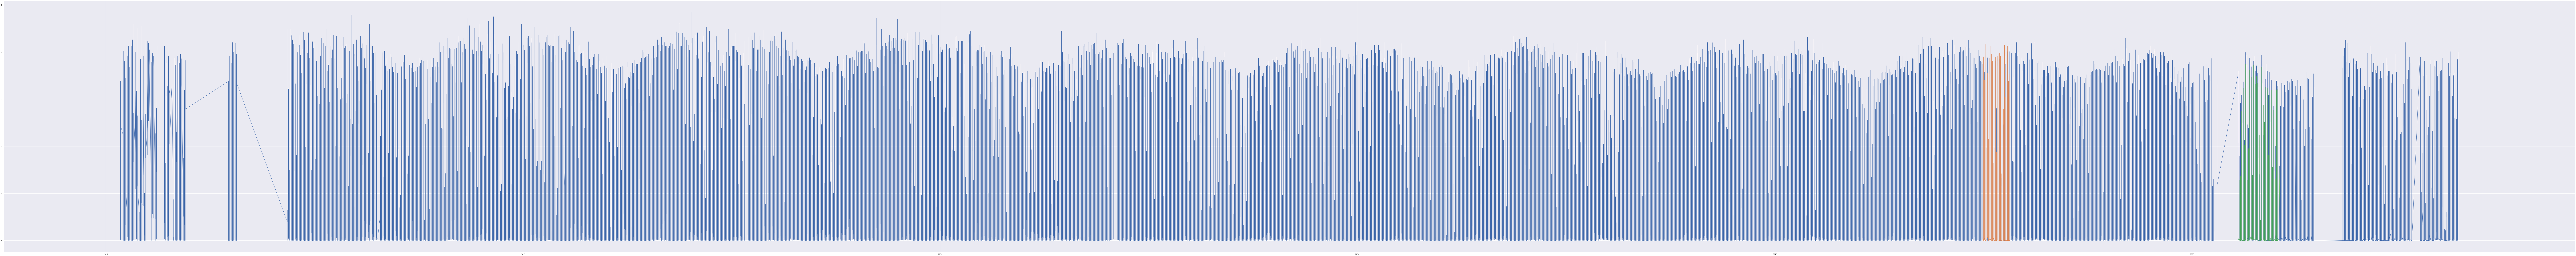

In [30]:
fig = plt.figure(figsize=(300,30))
for frame in [df_solar_Canterbury, df_solar_Sutherland, df_solar_StIves]:
  #plt.plot(frame['Date'], frame['PV Yield (kWh)'])
  plt.plot(frame['Date'], frame['PV Yield (5KWp)'])
  plt.show




### PV System Generation - Final PV dataset
Load one data set at a time, run and save results

#### NSW only

In [31]:
# df_pv = pd.read_csv("/content/project/data/PVGenerationNSW-2012_032021.csv") # NSW data


# # df_pv = pd.read_csv("/content/project/data/PVGenerationNSWACT-2012_032021.csv") # NSW & ACT  data
# # df_pv = pd.read_csv("/content/project/data/PVGenerationNSWACT-30+MW Excluded-2012_032021") # NSW & ACT  data, exclude > 30MW large scale solar

# # Format date time
# format = '%d/%m/%Y %H:%M'
# df_pv['DateTime'] = pd.to_datetime(df_pv['DateTime'], format=format)
# df_pv = df_pv.set_index(pd.DatetimeIndex(df_pv['DateTime']))

# # Rename index column
# # df_pv.rename(columns={'DateTime' :'DATETIME'},inplace=True)
# df_pv.rename_axis("DATETIME", axis='index', inplace=True)

# # Drop columns, only need PVGeneration(MW)
# df_pv.drop(['DateTime','Date', 'Time', 'Nearest BOM station temperature (C)','PV Yield KWh (5KWp System)','NSWTotalSize(MW)'], axis= 1, inplace= True)


# df_pv

#### NSW & ACT data

In [32]:
# df_pv = pd.read_csv("/content/project/data/PVGenerationNSWACT-2012_032021.csv") # NSW & ACT  data
# format = '%Y/%m/%d %H:%M'

# # df_pv = pd.read_csv("/content/project/data/PVGenerationNSWACT-30+MW Excluded-2012_032021") # NSW & ACT  data, exclude > 30MW large scale solar

# # Format date time
# df_pv['DateTime'] = pd.to_datetime(df_pv['DateTime'], format=format)
# df_pv = df_pv.set_index(pd.DatetimeIndex(df_pv['DateTime']))

# # Rename index column
# # df_pv.rename(columns={'DateTime' :'DATETIME'},inplace=True)
# df_pv.rename_axis("DATETIME", axis='index', inplace=True)

# # Drop columns, only need PVGeneration(MW)
# df_pv.drop(['DateTime'], axis= 1, inplace= True)


# df_pv

#### NSW & ACT Data Exclude > 30MW Large Scale Solar

In [33]:
 df_pv = pd.read_csv("/content/project/data/PVGenerationNSWACT-30+MW Excluded-2012_032021.csv") # NSW & ACT  data, exclude > 30MW large scale solar

# Format date time
format = '%Y/%m/%d %H:%M'
df_pv['DateTime'] = pd.to_datetime(df_pv['DateTime'], format=format)
df_pv = df_pv.set_index(pd.DatetimeIndex(df_pv['DateTime']))

# Rename index column
# df_pv.rename(columns={'DateTime' :'DATETIME'},inplace=True)
df_pv.rename_axis("DATETIME", axis='index', inplace=True)

# Drop columns, only need PVGeneration(MW)
df_pv.drop(['DateTime'], axis= 1, inplace= True)


df_pv

PVGeneration(MW)
DATETIME                             
2012-01-01 00:00:00                 0
2012-01-01 00:30:00                 0
2012-01-01 01:00:00                 0
2012-01-01 01:30:00                 0
2012-01-01 02:00:00                 0
...                               ...
2021-03-31 21:30:00                 0
2021-03-31 22:00:00                 0
2021-03-31 22:30:00                 0
2021-03-31 23:00:00                 0
2021-03-31 23:30:00                 0

[162144 rows x 1 columns]

# EDA Pre-Transformation

## Forecast Demand

In [34]:
# Commented out as run too long
# # This read_csv will truncate time so create as a new dataframe
# df_forecast_eda =pd.read_csv("/content/data/forecastdemand_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])
# #df_forecast_eda.head(10)

# # Plot resampling by month and year
# df_forecast_eda_eda_year =df_forecast_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_forecast_eda_eda_year['FORECASTDEMAND'])

# df_forecast_eda_eda_month =df_forecast_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_forecast_eda_eda_month['FORECASTDEMAND'])

# # Plot resampling by day
# df_forecast_eda_eda_day =df_forecast_eda.resample('D').mean()


# plt.figure(figsize=(30,5))
# plt.plot(df_forecast_eda_eda_day['FORECASTDEMAND'])
# #df_forecast_eda_eda_day.head(10)



## Temperature

In [35]:
# Commented out as run too long
# # This read_csv will truncate time so create as a new dataframe
# df_temp_eda =pd.read_csv("/content/data/temperature_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])
# df_temp_eda.head(10)
# # Plot resampling by month and year
# df_temp_eda_eda_year =df_temp_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_temp_eda_eda_year['TEMPERATURE'])

# df_temp_eda_eda_month =df_temp_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_temp_eda_eda_month['TEMPERATURE'])

# # Plot resampling by day
# df_temp_eda_eda_day =df_temp_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_temp_eda_eda_day['TEMPERATURE'])

## Total Demand

In [36]:
# Commented out as run too long
# # This read_csv will truncate time so create as a new dataframe
# df_totaldemand_eda =pd.read_csv("/content/data/totaldemand_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])

# # Plot resampling by month and year
# df_totaldemand_eda_eda_year =df_totaldemand_eda.resample('Y').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_totaldemand_eda_eda_year['TOTALDEMAND'])

# df_totaldemand_eda_eda_month =df_totaldemand_eda.resample('M').mean()
# #plt.figure(figsize=(30,10))
# plt.plot(df_totaldemand_eda_eda_month['TOTALDEMAND'])

# # Plot resampling by day
# df_totaldemand_eda_eda_day =df_totaldemand_eda.resample('D').mean()
# plt.figure(figsize=(30,5))
# plt.plot(df_totaldemand_eda_eda_day['TOTALDEMAND'])

## Boxplot to find outliers
For any outliers, may need to replace with NaN (subject to further investigation)

In [37]:

# sns.boxplot(x=df_forecast['FORECASTDEMAND'])
# plt.show()

In [38]:

# sns.boxplot(x=df_temp['TEMPERATURE'])
# plt.show()

In [39]:

# sns.boxplot(x=df_totaldemand['TOTALDEMAND'])
# plt.show()

## Histogram 

In [40]:

# ax = df_forecast['FORECASTDEMAND'].plot.hist(bins=18, alpha=0.65)

In [41]:

# ax = df_temp['TEMPERATURE'].plot.hist(bins=18, alpha=0.65)

In [42]:

# ax = df_totaldemand['TOTALDEMAND'].plot.hist(bins=18, alpha=0.65)

## Distribution

In [43]:

# sns.distplot(df_forecast["FORECASTDEMAND"])
# plt.title("Forecast Demand Distribution")

In [44]:

# sns.distplot(df_totaldemand["TOTALDEMAND"])
# plt.title("Total Demand Distribution")

In [45]:

# sns.distplot(df_temp["TEMPERATURE"])
# plt.title("Temperature Distribution")

# Transformation
Transformation includes following:
* Set datetime column as an index
* Convert datetime column from string to date time
* Splitting date and time columns
* Adding month, year, day name, week
* Adding public holidays (currently data.gov h as only far back to 2014, not 2010)

## Forecast Demand
* Filter to use only data form year 2012 onwards

### Main Transformation

In [46]:

# df_forecast = pd.read_csv("/content/data/forecastdemand_nsw.csv")

# Adding date, time, month, year, day for Forecast data
df_forecast['DATETIME'] = pd.to_datetime(df_forecast['DATETIME'])
df_forecast['Date'] = df_forecast['DATETIME'].dt.date
df_forecast['Time'] = df_forecast['DATETIME'].dt.time
df_forecast['Hour'] = df_forecast['DATETIME'].dt.hour  # Hour minute feautre to forecast this as categorical
df_forecast['Hour'] =  df_forecast['Hour'].astype(str)
df_forecast['Minute'] = df_forecast['DATETIME'].dt.minute
df_forecast['MINUTE_CAT'] = df_forecast['Minute'] 
df_forecast['Minute'] =  df_forecast['Minute'].astype(str)
df_forecast['HOURMINUTE'] = df_forecast['Hour'] + '-' + df_forecast['Minute']
df_forecast['Year'] = df_forecast['DATETIME'].dt.year 
df_forecast['Month'] = pd.to_numeric(df_forecast['DATETIME'].dt.month)
df_forecast['Day'] = df_forecast['DATETIME'].dt.day
df_forecast['Day_Name'] = df_forecast['DATETIME'].dt.day_name()
df_forecast['DayOfWeek'] = pd.to_numeric(df_forecast['DATETIME'].dt.dayofweek)
df_forecast = df_forecast.set_index(['DATETIME'])

### Filter data from Year 2012 onwards 
Filter data form Year 2018 onwards as only need 2 years of recent data to train and 1 year to test

In [47]:

# Filter to use only data from year 2012 onwards
# df_forecast = df_forecast.loc[(df_forecast['Year'] >= 2018) & (df_forecast['Year'] <= 2020)] # No need to train from 2021, only need 2 yrs recent data
df_forecast = df_forecast.loc[(df_forecast['Year'] >= 2018)] # No need to train from 2021, only need 2 yrs recent data including 2021
#df_forecast.tail(10)
#df_forecast.loc['2020-03-01']
df_forecast
#df_forecast.loc['2020-03'].groupby(['Date','REGIONID','Year','Month','Day']).mean()

PREDISPATCHSEQNO REGIONID  PERIODID  ...  Day  Day_Name DayOfWeek
DATETIME                                         ...                         
2018-01-01        2017123018     NSW1        71  ...    1    Monday         0
2018-01-01        2017123019     NSW1        70  ...    1    Monday         0
2018-01-01        2017123020     NSW1        69  ...    1    Monday         0
2018-01-01        2017123021     NSW1        68  ...    1    Monday         0
2018-01-01        2017123022     NSW1        67  ...    1    Monday         0
...                      ...      ...       ...  ...  ...       ...       ...
2021-03-18        2021031736     NSW1         5  ...   18  Thursday         3
2021-03-18        2021031737     NSW1         4  ...   18  Thursday         3
2021-03-18        2021031738     NSW1         3  ...   18  Thursday         3
2021-03-18        2021031739     NSW1         2  ...   18  Thursday         3
2021-03-18        2021031740     NSW1         1  ...   18  Thursday         3

[3121757 rows x 16 columns]

### Weekday Weekend (Categorical data) 

In [48]:
# # AFTER VIF THIS FEATURE IS NOT SIGNIFICANT SO COMMENTED OUT.
# # Adding & Grouping weekday, weekend to categorical column
# def weekday_weekend_list(df) :
#     if df['DayOfWeek'] <= 4 :
#         return 'weekday'
#     else:
#         return 'weekend'

# df_forecast['weekday_weekend'] = df_forecast.apply(lambda df_forecast:weekday_weekend_list(df_forecast), axis=1)

# # Drop tenture original before grouping column
# # df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

# df_forecast

### Seasons (Categorical data)

In [49]:
# # AFTER VIF THIS FEATURE IS SIGNIFICANT.
# Adding & Grouping seasons categorical columns
def season_list(df) :
    if (3 <= df['Month']) & (df['Month'] <= 5) :
        return 'autumn'
    if (6 <= df['Month']) & (df['Month'] <= 8) :
        return 'winter'
    if (9 <= df['Month']) & (df['Month'] <= 11) :
        return 'spring'        
    else:
        return 'summer'

df_forecast['SEASON'] = df_forecast.apply(lambda df_forecast:season_list(df_forecast), axis=1)

# Drop tenture original before grouping column
# df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

df_forecast

#ggplot(df_forecast, aes(x='Day_Name', y='FORECASTDEMAND', color = 'Year')) + geom_point()

PREDISPATCHSEQNO REGIONID  PERIODID  ...  Day_Name DayOfWeek  SEASON
DATETIME                                         ...                            
2018-01-01        2017123018     NSW1        71  ...    Monday         0  summer
2018-01-01        2017123019     NSW1        70  ...    Monday         0  summer
2018-01-01        2017123020     NSW1        69  ...    Monday         0  summer
2018-01-01        2017123021     NSW1        68  ...    Monday         0  summer
2018-01-01        2017123022     NSW1        67  ...    Monday         0  summer
...                      ...      ...       ...  ...       ...       ...     ...
2021-03-18        2021031736     NSW1         5  ...  Thursday         3  autumn
2021-03-18        2021031737     NSW1         4  ...  Thursday         3  autumn
2021-03-18        2021031738     NSW1         3  ...  Thursday         3  autumn
2021-03-18        2021031739     NSW1         2  ...  Thursday         3  autumn
2021-03-18        2021031740     NSW1         1  ...  Thursday         3  autumn

[3121757 rows x 17 columns]

### Minute 0 or 30 minute (Categorical data) 
* Minute O'clock and half (0 or 30 minute) vs non 0 or 30 minute (Categorical data) 

In [50]:
# # # AFTER VIF THIS FEATURE IS NOT SIGNIFICANT SO COMMENTED OUT.
# # Adding 0 or 30 minutes to categorical column
# def oclock_list(df) :
#     if df['MINUTE_CAT'] == 0 :
#         return 'oclock'
#     elif df['MINUTE_CAT'] == 30 :
#         return 'oclock'
#     else:
#         return 'non_oclock'


# df_forecast['OCLOCK'] = df_forecast.apply(lambda df_forecast:oclock_list(df_forecast), axis=1)

# df_forecast

In [51]:

df_forecast['2020-03-13']

PREDISPATCHSEQNO REGIONID  ...  DayOfWeek  SEASON
DATETIME                                        ...                   
2020-03-13 00:00:00        2020031118     NSW1  ...          4  autumn
2020-03-13 00:00:00        2020031119     NSW1  ...          4  autumn
2020-03-13 00:00:00        2020031120     NSW1  ...          4  autumn
2020-03-13 00:00:00        2020031121     NSW1  ...          4  autumn
2020-03-13 00:00:00        2020031122     NSW1  ...          4  autumn
...                               ...      ...  ...        ...     ...
2020-03-13 23:30:00        2020031335     NSW1  ...          4  autumn
2020-03-13 23:30:00        2020031336     NSW1  ...          4  autumn
2020-03-13 23:30:00        2020031337     NSW1  ...          4  autumn
2020-03-13 23:30:00        2020031338     NSW1  ...          4  autumn
2020-03-13 23:30:00        2020031339     NSW1  ...          4  autumn

[2664 rows x 17 columns]

## Temperature

In [52]:

#df_temp = pd.read_csv("/content/data/temperature_nsw.csv")

#df_temp = df_temp_eda 
#df_temp

# Format date time
format = '%d/%m/%Y %H:%M'
df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], format=format)
df_temp = df_temp.set_index(pd.DatetimeIndex(df_temp['DATETIME']))

df_temp

# Adding date, time for rollup before merge
# df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'])
df_temp['Date'] = df_temp['DATETIME'].dt.date
df_temp['Time'] = df_temp['DATETIME'].dt.time
df_temp['Hour'] = df_temp['DATETIME'].dt.hour
df_temp['Minute'] = df_temp['DATETIME'].dt.minute
# df_temp = df_temp.set_index(['DATETIME'])
df_temp

LOCATION            DATETIME  ...  Hour Minute
DATETIME                                            ...             
2010-01-01 00:00:00  Bankstown 2010-01-01 00:00:00  ...     0      0
2010-01-01 00:01:00  Bankstown 2010-01-01 00:01:00  ...     0      1
2010-01-01 00:30:00  Bankstown 2010-01-01 00:30:00  ...     0     30
2010-01-01 00:50:00  Bankstown 2010-01-01 00:50:00  ...     0     50
2010-01-01 01:00:00  Bankstown 2010-01-01 01:00:00  ...     1      0
...                        ...                 ...  ...   ...    ...
2021-03-17 23:00:00  Bankstown 2021-03-17 23:00:00  ...    23      0
2021-03-17 23:20:00  Bankstown 2021-03-17 23:20:00  ...    23     20
2021-03-17 23:30:00  Bankstown 2021-03-17 23:30:00  ...    23     30
2021-03-17 23:34:00  Bankstown 2021-03-17 23:34:00  ...    23     34
2021-03-18 00:00:00  Bankstown 2021-03-18 00:00:00  ...     0      0

[220326 rows x 7 columns]

### High Medium Low Temperature (Categorical data)

In [53]:
# # AFTER VIF THIS FEATURE IS SIGNIFICANT SO TO ADD EXTREME HIGH AND LOW.
## This should be done after resample
# # Adding & Grouping seasons categorical columns
# def temp_list(df) :
#     if (df['TEMPERATURE'] < 10) :
#         return "verylow" #'1 very low'
#     if (df['TEMPERATURE'] >= 10) & (df['TEMPERATURE'] < 20) :
#         return "low" #'2 low'
#     if (df['TEMPERATURE'] >= 20) & (df['TEMPERATURE'] < 30) :
#         return "high" #'3 high'
#     else:
#         return "veryhigh" #'3 very high >= 30'

# df_temp['TEMPERATURERANGES'] = df_temp.apply(lambda df_temp:temp_list(df_temp), axis=1)

# df_temp

In [54]:

# # Adding & Grouping seasons categorical columns
# def temp_list(df) :
#     if (df['TEMPERATURE'] < 10) :
#         return 1 #'low'
#     if (df['TEMPERATURE'] > 30) :
#         return 3 #'high'
#     else:
#         return 2 #'medium'

# df_temp['TEMPERATURERANGES'] = df_temp.apply(lambda df_temp:temp_list(df_temp), axis=1)

# df_temp

## Total Demand

In [55]:

#df_totaldemand = df_totaldemand_eda

#df_totaldemand = pd.read_csv("/content/data/totaldemand_nsw.csv")
# Format date time
format = '%d/%m/%Y %H:%M'
df_totaldemand['DATETIME'] = pd.to_datetime(df_totaldemand['DATETIME'], format=format)
#df_totaldemand = df_totaldemand.set_index(pd.DatetimeIndex(df_totaldemand['DATETIME']))
df_totaldemand = df_totaldemand.set_index(['DATETIME'])

df_totaldemand

TOTALDEMAND REGIONID
DATETIME                                 
2010-01-01 00:00:00      8038.00     NSW1
2010-01-01 00:30:00      7809.31     NSW1
2010-01-01 01:00:00      7483.69     NSW1
2010-01-01 01:30:00      7117.23     NSW1
2010-01-01 02:00:00      6812.03     NSW1
...                          ...      ...
2021-03-17 22:00:00      7419.77     NSW1
2021-03-17 22:30:00      7417.91     NSW1
2021-03-17 23:00:00      7287.32     NSW1
2021-03-17 23:30:00      7172.39     NSW1
2021-03-18 00:00:00      7094.51     NSW1

[196513 rows x 2 columns]

# Merge all dataframes
To merge 3 dataframes into one dataframe, below tranformation required when merge.
From: 2010-01-01
To: 2021-03-18

1. Forecast demand
* Data with date time every 30 minutes, multiple data points for each time
* The last data point to be taken
2. Temperature
* Data with date time every 30 minutes (some inconsistent), multiple data points for each time
* Average data to be taken
3. Total demand
* Data with date time every 30 minutes

## Forecast Demand
Rollup to get last changed per date time

In [56]:

# Before Merge
#df_forecast_merge = df_forecast.loc['2020-03-01']
df_forecast_merge = df_forecast

# Multiple data poitns pick only the last one using over partition rank by periodid

df_forecast_merge['rank_periodid'] = df_forecast_merge.groupby('DATETIME')['PERIODID'].rank(method='first')

df_forecast_merge = df_forecast_merge[df_forecast_merge['rank_periodid']==1]
df_forecast_merge

PREDISPATCHSEQNO REGIONID  ...  SEASON  rank_periodid
DATETIME                                        ...                       
2018-01-01 00:00:00        2017123140     NSW1  ...  summer            1.0
2018-01-01 00:30:00        2017123141     NSW1  ...  summer            1.0
2018-01-01 01:00:00        2017123142     NSW1  ...  summer            1.0
2018-01-01 01:30:00        2017123143     NSW1  ...  summer            1.0
2018-01-01 02:00:00        2017123144     NSW1  ...  summer            1.0
...                               ...      ...  ...     ...            ...
2021-03-17 22:00:00        2021031736     NSW1  ...  autumn            1.0
2021-03-17 22:30:00        2021031737     NSW1  ...  autumn            1.0
2021-03-17 23:00:00        2021031738     NSW1  ...  autumn            1.0
2021-03-17 23:30:00        2021031739     NSW1  ...  autumn            1.0
2021-03-18 00:00:00        2021031740     NSW1  ...  autumn            1.0

[56257 rows x 18 columns]

## Temperature
Rollup for non 00:00 or 00:30:  
between 00:00 and < 00:30 => 00:00 
between 00:30 and < 00:59 => 00:30 

In [57]:

#df_temp = pd.read_csv("/content/data/temperature_nsw.csv")
#df_temp =pd.read_csv("/content/data/temperature_nsw.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])


# # Format date time
# format = '%d/%m/%Y %H:%M'
# df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], format=format)
# df_temp = df_temp.set_index(pd.DatetimeIndex(df_temp['DATETIME']))

# df_temp



In [58]:
# Temperatureranges has not been used here because it has no mean!!!
df_temp_merge = df_temp.resample('30min').mean() # This will also added new rows when missing time interval

df_temp_merge.dtypes

TEMPERATURE    float64
Hour           float64
Minute         float64
dtype: object

### High Medium Low Temperature (Categorical data)
Need to do after re-sample to every 30mins; otherwise, it won't add this column.


In [59]:
# AFTER VIF THIS FEATURE IS SIGNIFICANT SO TO ADD EXTREME HIGH AND LOW.
# Adding & Grouping seasons categorical columns
def temp_list(df) :
    if (df['TEMPERATURE'] < 10) :
        return "verylow" #'1 very low'
    if (df['TEMPERATURE'] >= 10) & (df['TEMPERATURE'] < 20) :
        return "low" #'2 low'
    if (df['TEMPERATURE'] >= 20) & (df['TEMPERATURE'] < 30) :
        return "high" #'3 high'
    else:
        return "veryhigh" #'3 very high >= 30'

df_temp_merge['TEMPERATURERANGES'] = df_temp_merge.apply(lambda df_temp_merge:temp_list(df_temp_merge), axis=1)

df_temp_merge

TEMPERATURE  Hour  Minute TEMPERATURERANGES
DATETIME                                                        
2010-01-01 00:00:00        23.10   0.0     0.5              high
2010-01-01 00:30:00        22.80   0.0    40.0              high
2010-01-01 01:00:00        22.60   1.0     0.0              high
2010-01-01 01:30:00        22.50   1.0    30.0              high
2010-01-01 02:00:00        22.50   2.0     0.0              high
...                          ...   ...     ...               ...
2021-03-17 22:00:00        19.70  22.0     0.0               low
2021-03-17 22:30:00        19.50  22.0    30.0               low
2021-03-17 23:00:00        19.05  23.0    10.0               low
2021-03-17 23:30:00        18.80  23.0    32.0               low
2021-03-18 00:00:00        18.60   0.0     0.0               low

[196513 rows x 4 columns]

In [60]:
df_temp_merge 

TEMPERATURE  Hour  Minute TEMPERATURERANGES
DATETIME                                                        
2010-01-01 00:00:00        23.10   0.0     0.5              high
2010-01-01 00:30:00        22.80   0.0    40.0              high
2010-01-01 01:00:00        22.60   1.0     0.0              high
2010-01-01 01:30:00        22.50   1.0    30.0              high
2010-01-01 02:00:00        22.50   2.0     0.0              high
...                          ...   ...     ...               ...
2021-03-17 22:00:00        19.70  22.0     0.0               low
2021-03-17 22:30:00        19.50  22.0    30.0               low
2021-03-17 23:00:00        19.05  23.0    10.0               low
2021-03-17 23:30:00        18.80  23.0    32.0               low
2021-03-18 00:00:00        18.60   0.0     0.0               low

[196513 rows x 4 columns]

## Merge 

In [61]:

# # Merge all dataframes into the final dataframe

#df_forecast_merge = df_forecast.loc['2020-03-01']
# dfs = [df_forecast_merge, df_temp_merge, df_totaldemand, df_publicholidays_merge]
dfs = [df_forecast_merge, df_temp_merge, df_totaldemand, df_publicholidays_merge, df_pv]
# dfs = [df_forecast_merge, df_publicholidays_merge]
#dfs = [df_forecast_merge, df_temp_merge]
#dfs = [df_temp, df_totaldemand]

df_final = df_forecast_merge

for df in dfs:
    df_final = df_final.merge(df, on=['DATETIME'], how='outer')
    
#df_final.columns

In [62]:
df_final

PREDISPATCHSEQNO_x  ... PVGeneration(MW)
DATETIME                                 ...                 
2018-01-01 00:00:00        2.017123e+09  ...              0.0
2018-01-01 00:30:00        2.017123e+09  ...              0.0
2018-01-01 01:00:00        2.017123e+09  ...              0.0
2018-01-01 01:30:00        2.017123e+09  ...              0.0
2018-01-01 02:00:00        2.017123e+09  ...              0.0
...                                 ...  ...              ...
2021-04-01 22:00:00                 NaN  ...              NaN
2021-04-01 22:30:00                 NaN  ...              NaN
2021-04-01 23:00:00                 NaN  ...              NaN
2021-04-01 23:30:00                 NaN  ...              NaN
2021-04-02 00:00:00                 NaN  ...              NaN

[197233 rows x 44 columns]

### Add working day or non working day categorical data

In [63]:
# # # AFTER VIF THIS FEATURE IS NOT SIGNIFICANT SO COMMENTED  OUT.
# # Adding & Grouping working, non-working data to categorical column
# def public_holidays_list(df) :
#     if df['PUBLICHOLIDAYS'] == 1 or df['weekday_weekend_x'] == "weekend":
#         return 'non_working'
#     else:
#         return 'working'

# # df_forecast_merge['WORKINGDAY'] = df_forecast_merge.apply(lambda df_forecast_merge:public_holidays_list(df_forecast_merge), axis=1)

# df_final['WORKINGDAY'] = df_final.apply(lambda df_final:public_holidays_list(df_final), axis=1)

# # Drop original before grouping column
# # df_forecast.drop("DayOfWeek", axis= 1, inplace= True)

# df_final

### Drop unused columns

In [64]:

# Drop unused columns
df_final.drop(['FORECASTDEMAND_y','PREDISPATCHSEQNO_x', 'REGIONID_x', 'PERIODID_x', 'LASTCHANGED_x', 'rank_periodid_x', 
         'PREDISPATCHSEQNO_y', 'REGIONID_y', 'PERIODID_y','LASTCHANGED_y','Date_y',
         'Time_y', 'Year_y','Month_y', 'Day_y','Day_Name_y','rank_periodid_y','REGIONID', 'DayOfWeek_x','DayOfWeek_y',
         'Hour_x','Minute_x', 'Hour_y','Minute_y','HOURMINUTE_y', 'SEASON_y','MINUTE_CAT_y'], axis = 1, inplace=True) 

# Rename columns
df_final = df_final.rename({'FORECASTDEMAND_x':'FORECASTDEMAND', 'Date_x':'DATE', 'Time_x':'TIME', 'Year_x':'YEAR', 'Month_x':'MONTH', 
                 'Day_x':'DAY', 'Day_Name_x':'DAY_NAME', 'MINUTE_CAT_x':'MINUTE_CAT', 'Hour':'HOUR','Minute':'MINUTE',
                 'HOURMINUTE_x':'HOURMINUTE', 'SEASON_x':'SEASON'}, axis='columns')

df_final

FORECASTDEMAND  ... PVGeneration(MW)
DATETIME                             ...                 
2018-01-01 00:00:00         7094.57  ...              0.0
2018-01-01 00:30:00         6910.43  ...              0.0
2018-01-01 01:00:00         6706.53  ...              0.0
2018-01-01 01:30:00         6533.87  ...              0.0
2018-01-01 02:00:00         6317.65  ...              0.0
...                             ...  ...              ...
2021-04-01 22:00:00             NaN  ...              NaN
2021-04-01 22:30:00             NaN  ...              NaN
2021-04-01 23:00:00             NaN  ...              NaN
2021-04-01 23:30:00             NaN  ...              NaN
2021-04-02 00:00:00             NaN  ...              NaN

[197233 rows x 17 columns]

#### DIFF Demand


In [65]:

# Plot resampling by month and year
df_final['DIFFDEMAND'] = df_final['TOTALDEMAND'] - df_final['FORECASTDEMAND']


# EDA Public Holidays

## Total Demand

In [66]:

# # Plot resampling by day
# df_totaldemand_eda_eda_day =df_totaldemand_eda.resample('D').mean()
# plt.figure(figsize=(300,50))
# plt.plot(df_totaldemand_eda_eda_day['TOTALDEMAND'])
# # plt.figure(figsize=(30,5))
# plt.plot(df_publicholidays['PUBLICHOLIDAYS'], 'o')


## Forecast Demand

In [67]:

# # Plot resampling by day
# df_forecast_bushfire =df_forecast_eda.resample('D').mean()
# plt.figure(figsize=(300,50))
# plt.plot(df_forecast_eda_eda_day['FORECASTDEMAND'])
# # plt.figure(figsize=(30,5))
# plt.plot(df_publicholidays['PUBLICHOLIDAYS'], 'o')

# EDA Correlation
1. Temp v forcast demand
2. Temp v total demand
3. Temp v total - forcast
4. Time series of total - forcast

## Heatmap

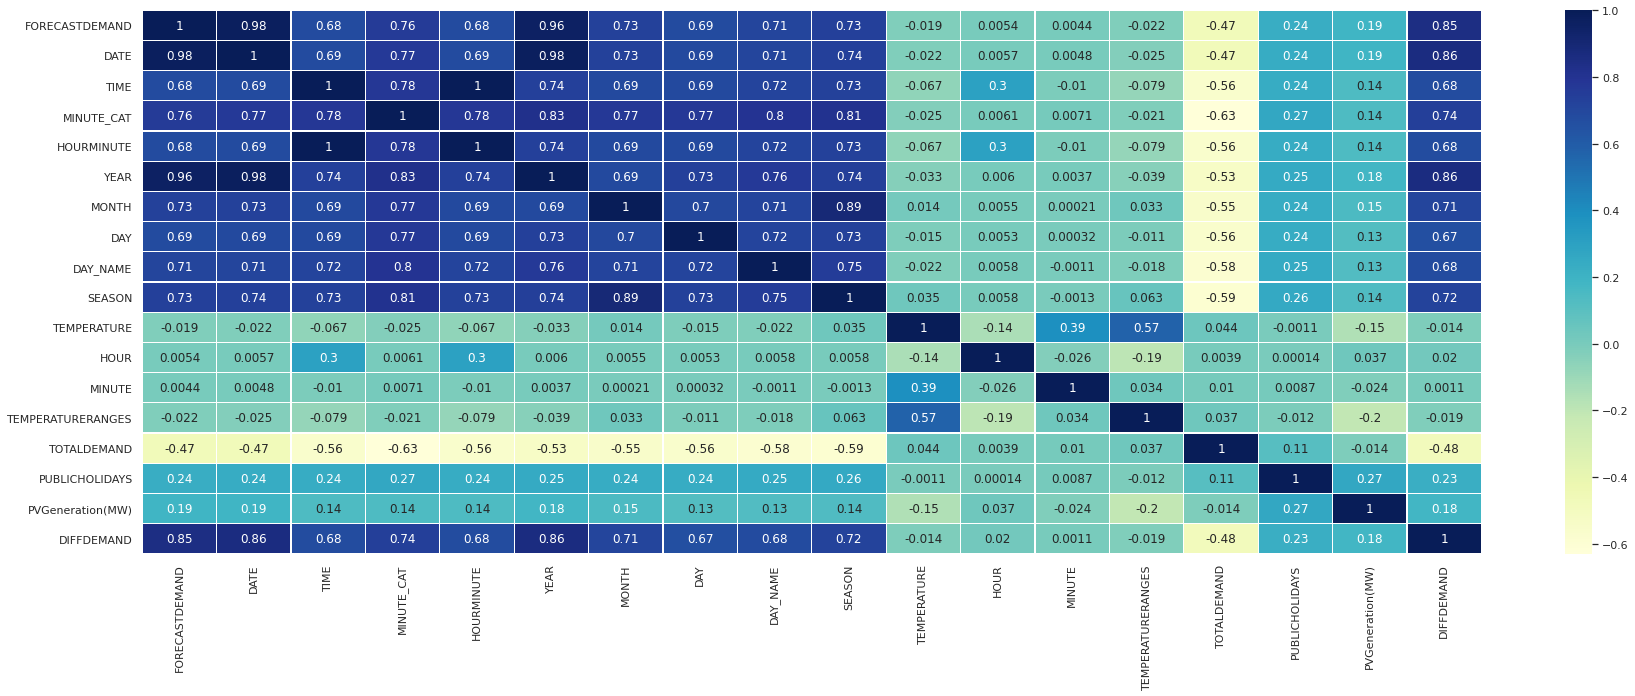

In [68]:

# Correlation betwen features
plt.figure(figsize=(30, 10))
corr = df_final.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True)

## Temperature


### Temperature vs Total Demand

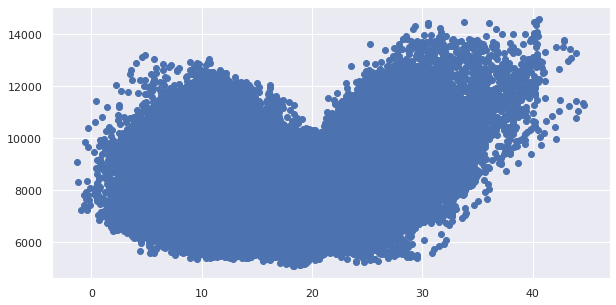

In [69]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['TOTALDEMAND'])

### Temperature vs Forecast Demand

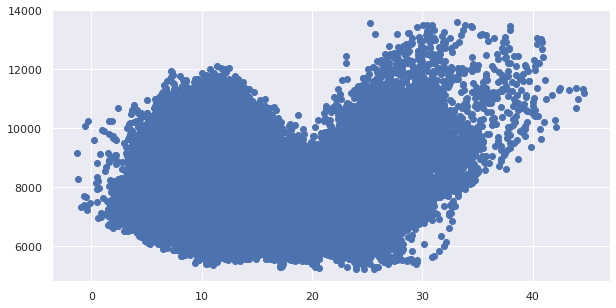

In [70]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['FORECASTDEMAND'])

### Temperature vs Total - Forecast


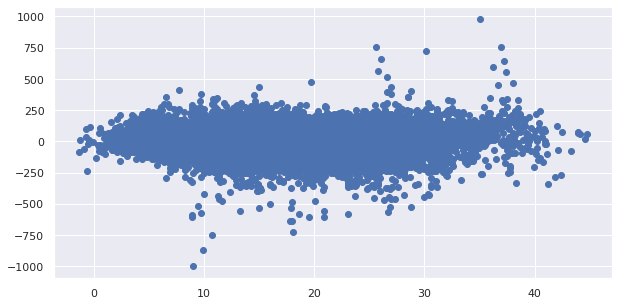

In [71]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['TEMPERATURE'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Weekday-Weekend


### Weekday-Weekend vs Total Demand

In [72]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['TOTALDEMAND'])

### Weekday-Weekend vs Forecast Demand

In [73]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['FORECASTDEMAND'])

### Weekday-Weekend vs Total - Forecast

In [74]:

# plt.figure(figsize=(10,5))
# plt.scatter(df_final['WEEKDAY_WEEKEND'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
# #plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Month

### Month vs Total Demand

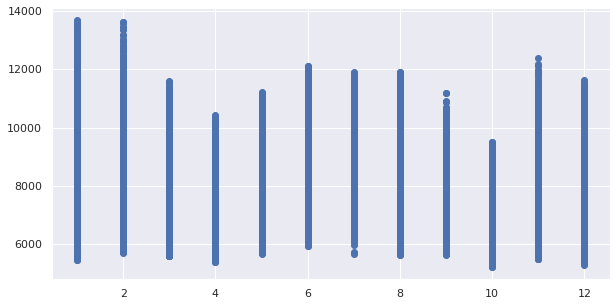

In [75]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MONTH'],df_final['TOTALDEMAND'])

### Month vs Forecast Demand

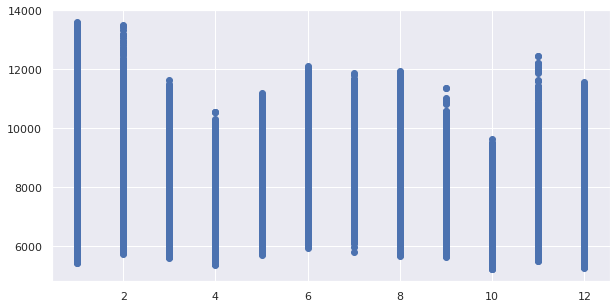

In [76]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MONTH'],df_final['FORECASTDEMAND'])

### Month vs Total - Forecast

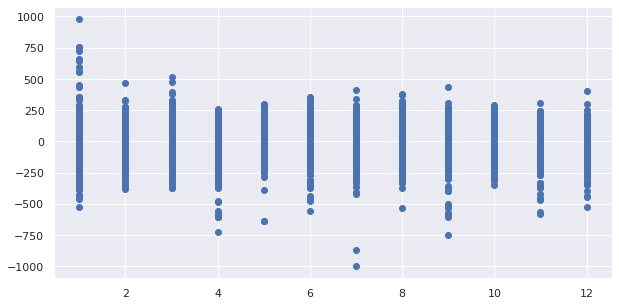

In [77]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MONTH'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Hours

### Hours vs Total Demand

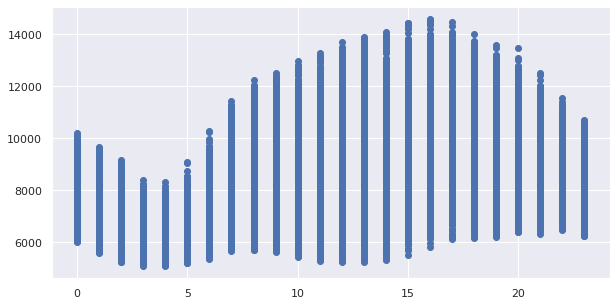

In [78]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['HOUR'],df_final['TOTALDEMAND'])

### Hours vs Forecast Demand

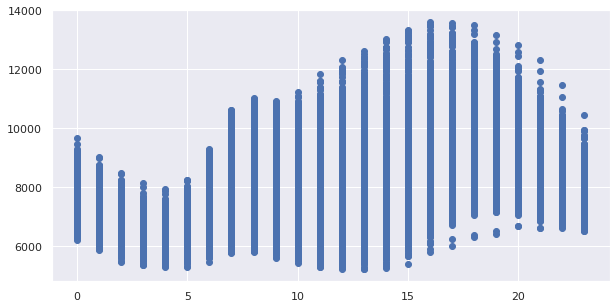

In [79]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['HOUR'],df_final['FORECASTDEMAND'])

### Hours vs Total - Forecast

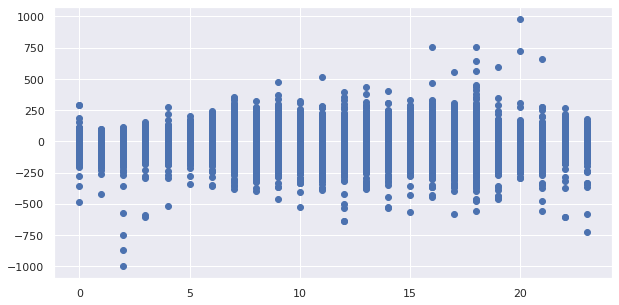

In [80]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['HOUR'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Minutes

### Minutes vs Total Demand

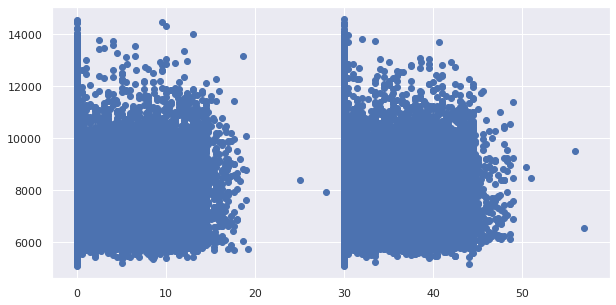

In [81]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MINUTE'],df_final['TOTALDEMAND'])

### Minutes vs Forecast Demand

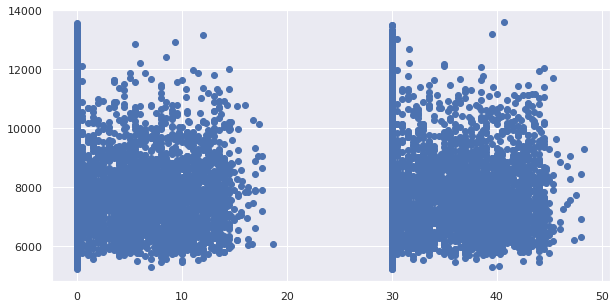

In [82]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MINUTE'],df_final['FORECASTDEMAND'])

### Minutes vs Total - Forecast Demand

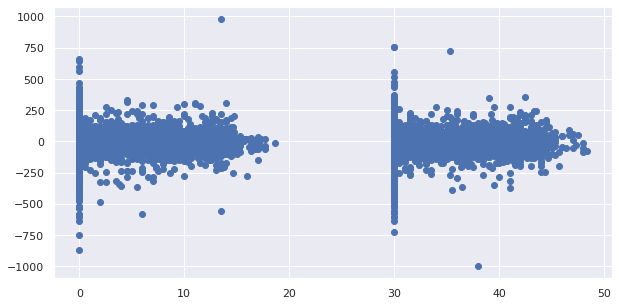

In [83]:

plt.figure(figsize=(10,5))
plt.scatter(df_final['MINUTE'],df_final['TOTALDEMAND']-df_final['FORECASTDEMAND'])
#plt.scatter(df_final['TEMPERATURE'],df_final_eda['DIFFDEMAND'])

## Time Series Diff Demand (Total Demand - Forecast Demand) 
Note:
* Algorithm changed in 2012

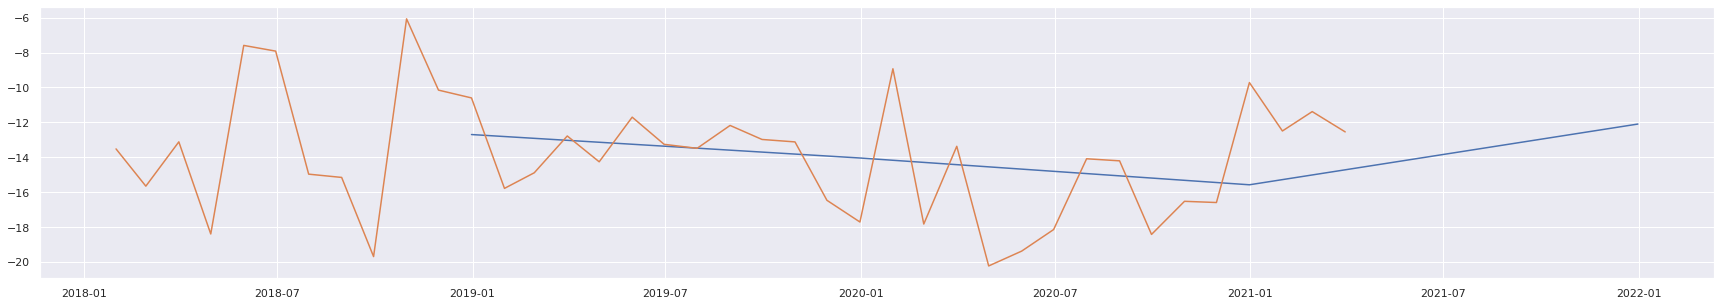

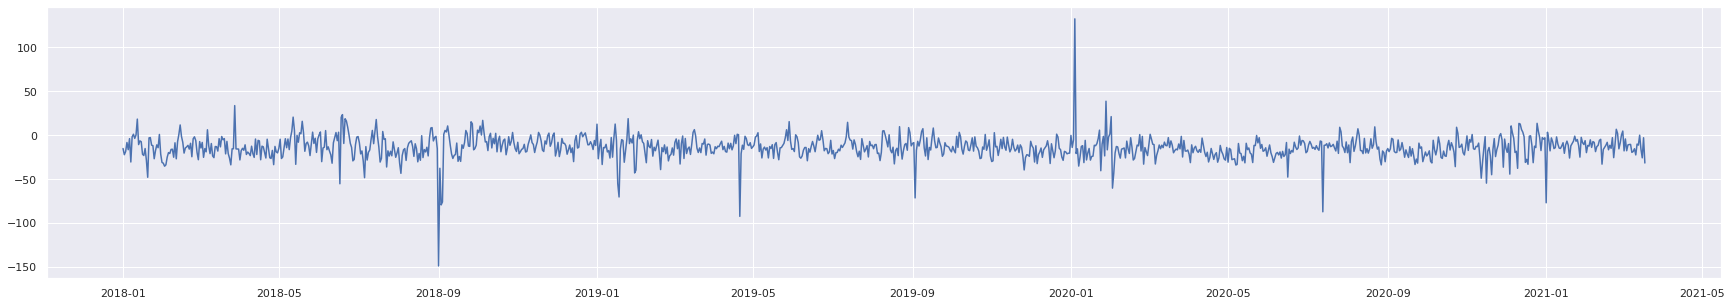

In [84]:

df_final_eda = df_final
df_final_eda_year = df_final_eda.resample('Y').mean()

plt.figure(figsize=(30,5))
plt.plot(df_final_eda_year['DIFFDEMAND'])

df_final_eda_eda_month =df_final_eda.resample('M').mean()
#plt.figure(figsize=(30,10))
plt.plot(df_final_eda_eda_month['DIFFDEMAND'])

# Plot resampling by day
df_final_eda_eda_day =df_final_eda.resample('D').mean()
plt.figure(figsize=(30,5))
plt.plot(df_final_eda_eda_day['DIFFDEMAND'])

## Regression

### Total Demand

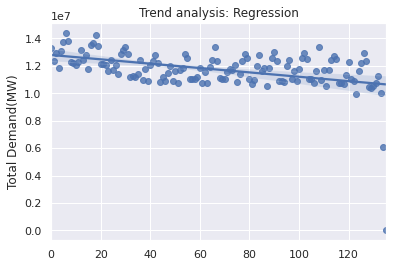

In [85]:

# Resampling per month
df_totaldemand_mon = df_final.TOTALDEMAND.resample("M").agg(sum).to_frame("TOTALDEMAND")
df_totaldemand_mon["ix"] = range(0, len(df_totaldemand_mon))
df_totaldemand_mon[:5]

# Regression plot
sns.regplot(data=df_totaldemand_mon,x="ix", y="TOTALDEMAND")
plt.title("Trend analysis: Regression")
plt.ylabel("Total Demand(MW)")
plt.xlabel("")
plt.show()

### Forecast Demand

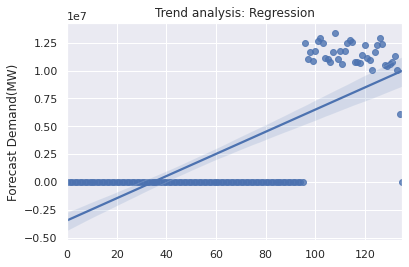

In [86]:

# Resampling per month
df_forecast_mon = df_final.FORECASTDEMAND.resample("M").agg(sum).to_frame("FORECASTDEMAND")
df_forecast_mon["ix"] = range(0, len(df_forecast_mon))
df_forecast_mon[:5]

# Regression plot
sns.regplot(data=df_forecast_mon,x="ix", y="FORECASTDEMAND")
plt.title("Trend analysis: Regression")
plt.ylabel("Forecast Demand(MW)")
plt.xlabel("")
plt.show()

## Boxplot

### Per Year

In [87]:
# Take too long so commented out
# sns.boxplot(data=df_final["2010":"2021"], x="YEAR", y="TOTALDEMAND")
# plt.title("Trend Analysis: Annual Box-plot Distribution")
# plt.ylabel("Total Demand (MW")
# plt.show()

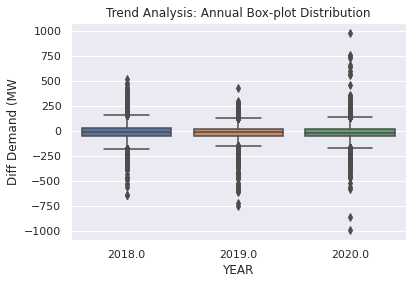

In [88]:
sns.boxplot(data=df_final["2018":"2020"], x="YEAR", y="DIFFDEMAND")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("Diff Demand (MW")
plt.show()

## Pairwise

In [89]:

top5_mostCorrFeats = corr["TOTALDEMAND"].apply(abs).sort_values(ascending=False).index.values[:7]
top5_mostCorrFeats

array(['TOTALDEMAND', 'MINUTE_CAT', 'SEASON', 'DAY_NAME', 'DAY', 'TIME',
       'HOURMINUTE'], dtype=object)

In [90]:
# # Take a long time so commented out for now.
# sns.pairplot(data=df_final[top5_mostCorrFeats].dropna(), kind="reg")
# plt.title("Most important features Matrix Scatter Plot")
# plt.show()

# Models

### Pre-Processing
* Drop unused columns
* One-hot Encoding
* Drop Na


In [91]:

# Drop unused columns
df_final_noonehot = df_final.drop(["DIFFDEMAND", "DATE", "TIME"] , axis= 1) # Drop FORECASTDEMAND???

# Drop na
df_final_noonehot.dropna(inplace=True)

# Apply one-hot encoding get dummies for multiple classes
# df = pd.get_dummies(data = df,columns = multiple_columns) 
# df_final_onehot = pd.get_dummies(data = df_final_onehot.loc['2020']) ### LIMIT DATA TO ONLY YEAR 2021
df_final_onehot = pd.get_dummies(data = df_final_noonehot) 


# Drop below columns after feature selection using regression
# Drop unused columns
## df_final_onehot.drop(['MONTH','DAY','MINUTE','PUBLICHOLIDAYS','HOURMINUTE_10-30','HOURMINUTE_16-30','HOURMINUTE_19-0'
##                       ,'HOURMINUTE_17-30','HOURMINUTE_13-30','HOURMINUTE_15-30','HOURMINUTE_11-30','HOURMINUTE_12-30'
##                       ], axis = 1, inplace=True) 

df_final_onehot

FORECASTDEMAND  ...  TEMPERATURERANGES_verylow
DATETIME                             ...                           
2018-01-01 00:00:00         7094.57  ...                          0
2018-01-01 00:30:00         6910.43  ...                          0
2018-01-01 01:00:00         6706.53  ...                          0
2018-01-01 01:30:00         6533.87  ...                          0
2018-01-01 02:00:00         6317.65  ...                          0
...                             ...  ...                        ...
2021-03-17 22:00:00         7409.33  ...                          0
2021-03-17 22:30:00         7422.63  ...                          0
2021-03-17 23:00:00         7313.13  ...                          0
2021-03-17 23:30:00         7192.94  ...                          0
2021-03-18 00:00:00         7126.37  ...                          0

[56229 rows x 74 columns]

### Drop columns before VIF
Drop DAY, SEASON, WEEKDAY_WEEKEND, WORKINGDAY
https://stackoverflow.com/questions/41136853/whats-the-difference-between-dummy-variable-and-one-hot-encoding

In [92]:
# Drop columns before VIF - Drop DAY, SEASON, WEEKDAY_WEEKEND, WORKINGDAY
# df_final_onehot.drop(['HOURMINUTE_9-30','DAY_NAME_Wednesday','SEASON_winter'], axis = 1, inplace=True)

In [93]:
# X contains all the features that are used for making the predictions.
# Y contains outcomes 
X = df_final_onehot.drop(["TOTALDEMAND"] , axis= 1)
y = df_final_onehot['TOTALDEMAND']

# y = df_final_onehot[['YEAR','TOTALDEMAND']] # Add year for filter train and test data

# X = df_final_noonehot.drop(["TOTALDEMAND"] , axis= 1)
# y = df_final_noonehot['TOTALDEMAND']

df_final_onehot
# df_final_noonehot

FORECASTDEMAND  ...  TEMPERATURERANGES_verylow
DATETIME                             ...                           
2018-01-01 00:00:00         7094.57  ...                          0
2018-01-01 00:30:00         6910.43  ...                          0
2018-01-01 01:00:00         6706.53  ...                          0
2018-01-01 01:30:00         6533.87  ...                          0
2018-01-01 02:00:00         6317.65  ...                          0
...                             ...  ...                        ...
2021-03-17 22:00:00         7409.33  ...                          0
2021-03-17 22:30:00         7422.63  ...                          0
2021-03-17 23:00:00         7313.13  ...                          0
2021-03-17 23:30:00         7192.94  ...                          0
2021-03-18 00:00:00         7126.37  ...                          0

[56229 rows x 74 columns]

### VIF - Variance Inflation Factor
* Calculate VIF for individual variable
* Drop column if value is too large
* R: LM => VIF => Re-do
* Drop last one-hot columns (last...30min time, season, workday, day, weekend) & VIF & drop columns before regression

https://etav.github.io/python/vif_factor_python.html#:~:text=The%20Variance%20Inflation%20Factor%20


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor                    features
0     3.510838              FORECASTDEMAND
1          inf                  MINUTE_CAT
2     1.159085                        YEAR
3     1.994174                       MONTH
4     1.003580                         DAY
..         ...                         ...
68         inf               SEASON_winter
69         inf      TEMPERATURERANGES_high
70         inf       TEMPERATURERANGES_low
71         inf  TEMPERATURERANGES_veryhigh
72         inf   TEMPERATURERANGES_verylow

[73 rows x 2 columns]

In [95]:
# vif.round(1)

# Filter to use only data from year 2012 onwards
vif_out = vif.loc[(vif['VIF Factor'] >= 100)]
vif_out

VIF Factor                    features
1          inf                  MINUTE_CAT
6          inf                        HOUR
10         inf              HOURMINUTE_0-0
11         inf             HOURMINUTE_0-30
12         inf              HOURMINUTE_1-0
..         ...                         ...
68         inf               SEASON_winter
69         inf      TEMPERATURERANGES_high
70         inf       TEMPERATURERANGES_low
71         inf  TEMPERATURERANGES_veryhigh
72         inf   TEMPERATURERANGES_verylow

[65 rows x 2 columns]

In [96]:
X.columns

Index(['FORECASTDEMAND', 'MINUTE_CAT', 'YEAR', 'MONTH', 'DAY', 'TEMPERATURE',
       'HOUR', 'MINUTE', 'PUBLICHOLIDAYS', 'PVGeneration(MW)',
       'HOURMINUTE_0-0', 'HOURMINUTE_0-30', 'HOURMINUTE_1-0',
       'HOURMINUTE_1-30', 'HOURMINUTE_10-0', 'HOURMINUTE_10-30',
       'HOURMINUTE_11-0', 'HOURMINUTE_11-30', 'HOURMINUTE_12-0',
       'HOURMINUTE_12-30', 'HOURMINUTE_13-0', 'HOURMINUTE_13-30',
       'HOURMINUTE_14-0', 'HOURMINUTE_14-30', 'HOURMINUTE_15-0',
       'HOURMINUTE_15-30', 'HOURMINUTE_16-0', 'HOURMINUTE_16-30',
       'HOURMINUTE_17-0', 'HOURMINUTE_17-30', 'HOURMINUTE_18-0',
       'HOURMINUTE_18-30', 'HOURMINUTE_19-0', 'HOURMINUTE_19-30',
       'HOURMINUTE_2-0', 'HOURMINUTE_2-30', 'HOURMINUTE_20-0',
       'HOURMINUTE_20-30', 'HOURMINUTE_21-0', 'HOURMINUTE_21-30',
       'HOURMINUTE_22-0', 'HOURMINUTE_22-30', 'HOURMINUTE_23-0',
       'HOURMINUTE_23-30', 'HOURMINUTE_3-0', 'HOURMINUTE_3-30',
       'HOURMINUTE_4-0', 'HOURMINUTE_4-30', 'HOURMINUTE_5-0',
       'HOURMINUTE_

### Drop columns after VIF


In [97]:
# Drop columns before VIF - Drop DAY, SEASON, WEEKDAY_WEEKEND, WORKINGDAY
X.drop(['MINUTE_CAT',
        'TEMPERATURERANGES_high','TEMPERATURERANGES_low',
        # 'SEASON_summer',
# 'HOUR',
'HOURMINUTE_0-0',
'HOURMINUTE_0-30',
'HOURMINUTE_1-0',
'HOURMINUTE_1-30',
'HOURMINUTE_10-0',
'HOURMINUTE_10-30',
'HOURMINUTE_11-0',
'HOURMINUTE_11-30',
'HOURMINUTE_12-0',
'HOURMINUTE_12-30',
'HOURMINUTE_13-0',
'HOURMINUTE_13-30',
'HOURMINUTE_14-0',
# 'HOURMINUTE_14-30',
'HOURMINUTE_15-0',
'HOURMINUTE_15-30',
'HOURMINUTE_16-0',
# 'HOURMINUTE_16-30',
'HOURMINUTE_17-0',
'HOURMINUTE_17-30',
# 'HOURMINUTE_18-0',
# 'HOURMINUTE_18-30',
# 'HOURMINUTE_19-0',
'HOURMINUTE_19-30',
# 'HOURMINUTE_2-0',
# 'HOURMINUTE_2-30',
# 'HOURMINUTE_20-0',
# 'HOURMINUTE_20-30',
# 'HOURMINUTE_21-0',
'HOURMINUTE_21-30',
'HOURMINUTE_22-0',
'HOURMINUTE_22-30',
'HOURMINUTE_23-0',
'HOURMINUTE_23-30',
'HOURMINUTE_3-0',
'HOURMINUTE_3-30',
'HOURMINUTE_4-0',
'HOURMINUTE_4-30',
'HOURMINUTE_5-0',
'HOURMINUTE_5-30',
'HOURMINUTE_6-0',
'HOURMINUTE_6-30',
'HOURMINUTE_7-0',
'HOURMINUTE_7-30',
'HOURMINUTE_8-0',
'HOURMINUTE_8-30'], axis = 1, inplace=True)

In [98]:
# # Drop columns before VIF - Drop DAY, SEASON, WEEKDAY_WEEKEND, WORKINGDAY
# X.drop(['MINUTE_CAT','SEASON_summer',
# 'HOUR',
# 'HOURMINUTE_0-0',
# 'HOURMINUTE_0-30',
# 'HOURMINUTE_1-0',
# 'HOURMINUTE_1-30',
# 'HOURMINUTE_10-0',
# 'HOURMINUTE_10-30',
# 'HOURMINUTE_11-0',
# 'HOURMINUTE_11-30',
# 'HOURMINUTE_12-0',
# 'HOURMINUTE_12-30',
# 'HOURMINUTE_13-0',
# 'HOURMINUTE_13-30',
# 'HOURMINUTE_14-0',
# 'HOURMINUTE_14-30',
# 'HOURMINUTE_15-0',
# 'HOURMINUTE_15-30',
# 'HOURMINUTE_16-0',
# 'HOURMINUTE_16-30',
# 'HOURMINUTE_17-0',
# 'HOURMINUTE_17-30',
# 'HOURMINUTE_18-0',
# 'HOURMINUTE_18-30',
# 'HOURMINUTE_19-0',
# 'HOURMINUTE_19-30',
# 'HOURMINUTE_2-0',
# 'HOURMINUTE_2-30',
# 'HOURMINUTE_20-0',
# 'HOURMINUTE_20-30',
# 'HOURMINUTE_21-0',
# 'HOURMINUTE_21-30',
# 'HOURMINUTE_22-0',
# 'HOURMINUTE_22-30',
# 'HOURMINUTE_23-0',
# 'HOURMINUTE_23-30',
# 'HOURMINUTE_3-0',
# 'HOURMINUTE_3-30',
# 'HOURMINUTE_4-0',
# 'HOURMINUTE_4-30',
# 'HOURMINUTE_5-0',
# 'HOURMINUTE_5-30',
# 'HOURMINUTE_6-0',
# 'HOURMINUTE_6-30',
# 'HOURMINUTE_7-0',
# 'HOURMINUTE_7-30',
# 'HOURMINUTE_8-0',
# 'HOURMINUTE_8-30'], axis = 1, inplace=True)

In [99]:
# Break for Feature engineering
# Xaaa

## Split data

In [100]:
 X

FORECASTDEMAND  ...  TEMPERATURERANGES_verylow
DATETIME                             ...                           
2018-01-01 00:00:00         7094.57  ...                          0
2018-01-01 00:30:00         6910.43  ...                          0
2018-01-01 01:00:00         6706.53  ...                          0
2018-01-01 01:30:00         6533.87  ...                          0
2018-01-01 02:00:00         6317.65  ...                          0
...                             ...  ...                        ...
2021-03-17 22:00:00         7409.33  ...                          0
2021-03-17 22:30:00         7422.63  ...                          0
2021-03-17 23:00:00         7313.13  ...                          0
2021-03-17 23:30:00         7192.94  ...                          0
2021-03-18 00:00:00         7126.37  ...                          0

[56229 rows x 34 columns]

In [101]:
y

DATETIME
2018-01-01 00:00:00    7034.74
2018-01-01 00:30:00    6912.25
2018-01-01 01:00:00    6745.63
2018-01-01 01:30:00    6466.06
2018-01-01 02:00:00    6279.80
                        ...   
2021-03-17 22:00:00    7419.77
2021-03-17 22:30:00    7417.91
2021-03-17 23:00:00    7287.32
2021-03-17 23:30:00    7172.39
2021-03-18 00:00:00    7094.51
Name: TOTALDEMAND, Length: 56229, dtype: float64

In [102]:
# Split train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 25)

# Split train and test data - use year 2020 data for Test
X_train =  X.loc[(X['YEAR'] != 2020)]
X_test =  X.loc[(X['YEAR'] == 2020)]

y_train = df_final_onehot['TOTALDEMAND'].loc[(df_final_onehot['YEAR'] != 2020)]
y_test = df_final_onehot['TOTALDEMAND'].loc[(df_final_onehot['YEAR'] == 2020)]

y_test

DATETIME
2020-01-01 00:00:00    7318.64
2020-01-01 00:30:00    7134.15
2020-01-01 01:00:00    6886.14
2020-01-01 01:30:00    6682.01
2020-01-01 02:00:00    6452.46
                        ...   
2020-12-31 21:30:00    7072.75
2020-12-31 22:00:00    7062.97
2020-12-31 22:30:00    7172.60
2020-12-31 23:00:00    7125.65
2020-12-31 23:30:00    7080.04
Name: TOTALDEMAND, Length: 17566, dtype: float64

### Final Drop Columns X_train X_test

In [103]:
# Testing to keep year
# # Drop columns 
# X_train.drop(['YEAR'], axis = 1, inplace=True)
# X_test.drop(['YEAR'], axis = 1, inplace=True)

In [104]:
# # Drop columns 
# X_train.drop(['FORECASTDEMAND'], axis = 1, inplace=True)
# X_test.drop(['FORECASTDEMAND'], axis = 1, inplace=True)

In [105]:
# # Drop columns 
# X_train.drop(['TEMPERATURE'], axis = 1, inplace=True)
# X_test.drop(['TEMPERATURE'], axis = 1, inplace=True)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif_train = pd.DataFrame()
vif_train["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_train["features"] = X_train.columns

vif_train

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor                    features
0     2.341350              FORECASTDEMAND
1     1.273090                        YEAR
2     2.072272                       MONTH
3     1.005971                         DAY
4     4.250301                 TEMPERATURE
5     1.814439                        HOUR
6     1.337694                      MINUTE
7     1.055998              PUBLICHOLIDAYS
8     1.725625            PVGeneration(MW)
9     1.064736            HOURMINUTE_14-30
10    1.070413            HOURMINUTE_16-30
11    1.124404             HOURMINUTE_18-0
12    1.113800            HOURMINUTE_18-30
13    1.131693             HOURMINUTE_19-0
14    1.086061              HOURMINUTE_2-0
15    1.095509             HOURMINUTE_2-30
16    1.124368             HOURMINUTE_20-0
17    1.102439            HOURMINUTE_20-30
18    1.125264             HOURMINUTE_21-0
19    1.057064              HOURMINUTE_9-0
20    1.082235             HOURMINUTE_9-30
21         inf             DAY_NAME_Friday
22         inf             DAY_NAME_Monday
23         inf           DAY_NAME_Saturday
24         inf             DAY_NAME_Sunday
25         inf           DAY_NAME_Thursday
26         inf            DAY_NAME_Tuesday
27         inf          DAY_NAME_Wednesday
28         inf               SEASON_autumn
29         inf               SEASON_spring
30         inf               SEASON_summer
31         inf               SEASON_winter
32    1.307938  TEMPERATURERANGES_veryhigh
33    1.831708   TEMPERATURERANGES_verylow

In [107]:
X_train
# X_test

FORECASTDEMAND  ...  TEMPERATURERANGES_verylow
DATETIME                             ...                           
2018-01-01 00:00:00         7094.57  ...                          0
2018-01-01 00:30:00         6910.43  ...                          0
2018-01-01 01:00:00         6706.53  ...                          0
2018-01-01 01:30:00         6533.87  ...                          0
2018-01-01 02:00:00         6317.65  ...                          0
...                             ...  ...                        ...
2021-03-17 22:00:00         7409.33  ...                          0
2021-03-17 22:30:00         7422.63  ...                          0
2021-03-17 23:00:00         7313.13  ...                          0
2021-03-17 23:30:00         7192.94  ...                          0
2021-03-18 00:00:00         7126.37  ...                          0

[38663 rows x 34 columns]

In [108]:
y_train
# y_test

DATETIME
2018-01-01 00:00:00    7034.74
2018-01-01 00:30:00    6912.25
2018-01-01 01:00:00    6745.63
2018-01-01 01:30:00    6466.06
2018-01-01 02:00:00    6279.80
                        ...   
2021-03-17 22:00:00    7419.77
2021-03-17 22:30:00    7417.91
2021-03-17 23:00:00    7287.32
2021-03-17 23:30:00    7172.39
2021-03-18 00:00:00    7094.51
Name: TOTALDEMAND, Length: 38663, dtype: float64

In [109]:

# # Number of observations
nobs= len(df_final_onehot)
print("Number of observations: ", nobs)

# X_train = df_final.loc['2010':'2021'][top5_mostCorrFeats]
# #X_train = df_final[top5_mostCorrFeats]
# y_train = df_final.loc["2010":"2021"]['TOTALDEMAND']
# #y_train = df_final['TOTALDEMAND']

# X_test = df_final.loc["2018"][top5_mostCorrFeats]
# y_test = df_final.loc["2018"]['TOTALDEMAND']

n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

# plt.plot(y_train.index, y_train.TOTALDEMAND.values, label="train")
# plt.plot(y_test.index, y_test.TOTALDEMAND.values, label="test")
# plt.title("Train/Test split")
# plt.xticks(rotation=45)
# plt.show()

Number of observations:  56229
Total number of observations:  56229
Train: (38663, 34)(38663,), 
Test: (17566, 34)(17566,)


## Feature Selection
* Use Regression to see significances (for regression)
* User Random Forest to see weights (for classification, not regression)

In [110]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTALDEMAND   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.622e+05
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:01:21   Log-Likelihood:            -3.1775e+05
No. Observations:               56229   AIC:                         6.356e+05
Df Residuals:                   56196   BIC:                         6.359e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Export CSV files for model and X, y
Export final dataframe into CSV file so no need to re-run everything over and over. Just stright to the model 



In [111]:
# Export dataframt to CSV for model
df_final.to_csv("/content/data/model_input.csv")
df_final_onehot.to_csv("/content/data/model_input_onehot.csv")

# Export dataframt to CSV for model
X_train.to_csv("/content/data/xtrain.csv")
X_test.to_csv("/content/data/xtest.csv")
y_train.to_csv("/content/data/ytrain.csv")
y_test.to_csv("/content/data/ytest.csv")

# # To read
# df_model = pd.read_csv("/content/data/output.csv")
# df_model

In [112]:

# # To read
# df_model = pd.read_csv("/content/data/output.csv")
# df_model

In [113]:
X_train.columns

Index(['FORECASTDEMAND', 'YEAR', 'MONTH', 'DAY', 'TEMPERATURE', 'HOUR',
       'MINUTE', 'PUBLICHOLIDAYS', 'PVGeneration(MW)', 'HOURMINUTE_14-30',
       'HOURMINUTE_16-30', 'HOURMINUTE_18-0', 'HOURMINUTE_18-30',
       'HOURMINUTE_19-0', 'HOURMINUTE_2-0', 'HOURMINUTE_2-30',
       'HOURMINUTE_20-0', 'HOURMINUTE_20-30', 'HOURMINUTE_21-0',
       'HOURMINUTE_9-0', 'HOURMINUTE_9-30', 'DAY_NAME_Friday',
       'DAY_NAME_Monday', 'DAY_NAME_Saturday', 'DAY_NAME_Sunday',
       'DAY_NAME_Thursday', 'DAY_NAME_Tuesday', 'DAY_NAME_Wednesday',
       'SEASON_autumn', 'SEASON_spring', 'SEASON_summer', 'SEASON_winter',
       'TEMPERATURERANGES_veryhigh', 'TEMPERATURERANGES_verylow'],
      dtype='object')

## Baseline Model
See experiments in Google Drive
https://docs.google.com/spreadsheets/d/1jlGG8LbfcLQqmZCmj8_bcaE1bNGVWKzMauO-W7D2-i0/edit?usp=sharing

### MLPRegressor

In [114]:
import sklearn
import numpy as np
from sklearn.neural_network import MLPRegressor 

def rmse(pred, actual): 
	return np.sqrt(((pred-actual)**2).mean())

# Neural Network Model
mlp_adam = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=0.001,max_iter=5000, tol=0)
mlp_adam.fit(X_train,y_train)
y_predicttrain = mlp_adam.predict(X_train)
y_predicttest = mlp_adam.predict(X_test)
train_rmse = rmse( y_predicttrain, y_train) 
test_rmse = rmse( y_predicttest, y_test) 

# print(train_acc, test_acc) 
print('Train RMSE: {}\nTest RMSE: {}'.format(train_rmse, test_rmse))

Train RMSE: 68.33700118884374
Test RMSE: 70.52746351383111


#### Save Prediction Output

### Plot output

In [115]:
# y_test.to_csv("/content/data/output_y_test.csv")
# y_predicttest.to_csv("/content/data/output_y_predicttest.csv")

np.savetxt("/content/data/output_y_test.csv", y_test, delimiter=",")
np.savetxt("/content/data/output_y_predicttest.csv", y_predicttest, delimiter=",")



#### Y Train vs Y Train Predict

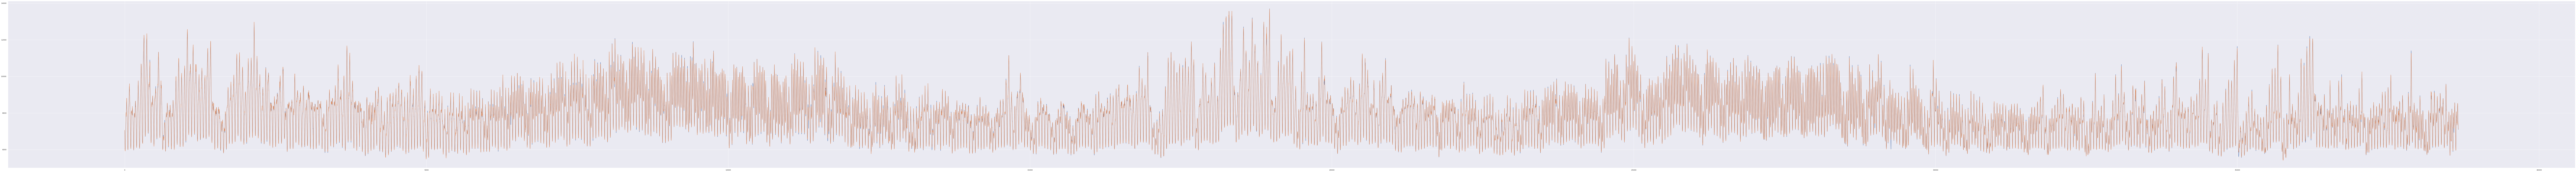

In [116]:
# Convert numpy to dataframe
df_y_predicttrain = pd.DataFrame(y_predicttrain, columns = ['TOTALDEMAND'])
df_y_predicttrain.insert(0, 'New_ID', range(0, 0 + len(df_y_predicttrain)))

# Convert to dataframe and insert new ID for join
df_y_train = pd.DataFrame(y_train, columns = ['TOTALDEMAND'])
df_y_train.insert(0, 'New_ID', range(0, 0 + len(df_y_train)))
# df_y_train

# Join train and predict output dataframes
df_y_train_plot = pd.merge(df_y_train, df_y_predicttrain, how='left', left_on='New_ID', right_on='New_ID')

# Plot Output
plt.figure(figsize=(300,20))
plt.plot(df_y_train_plot['TOTALDEMAND_x'])
plt.plot(df_y_train_plot['TOTALDEMAND_y']) # Y Predict Train

#### Y Train Y Test

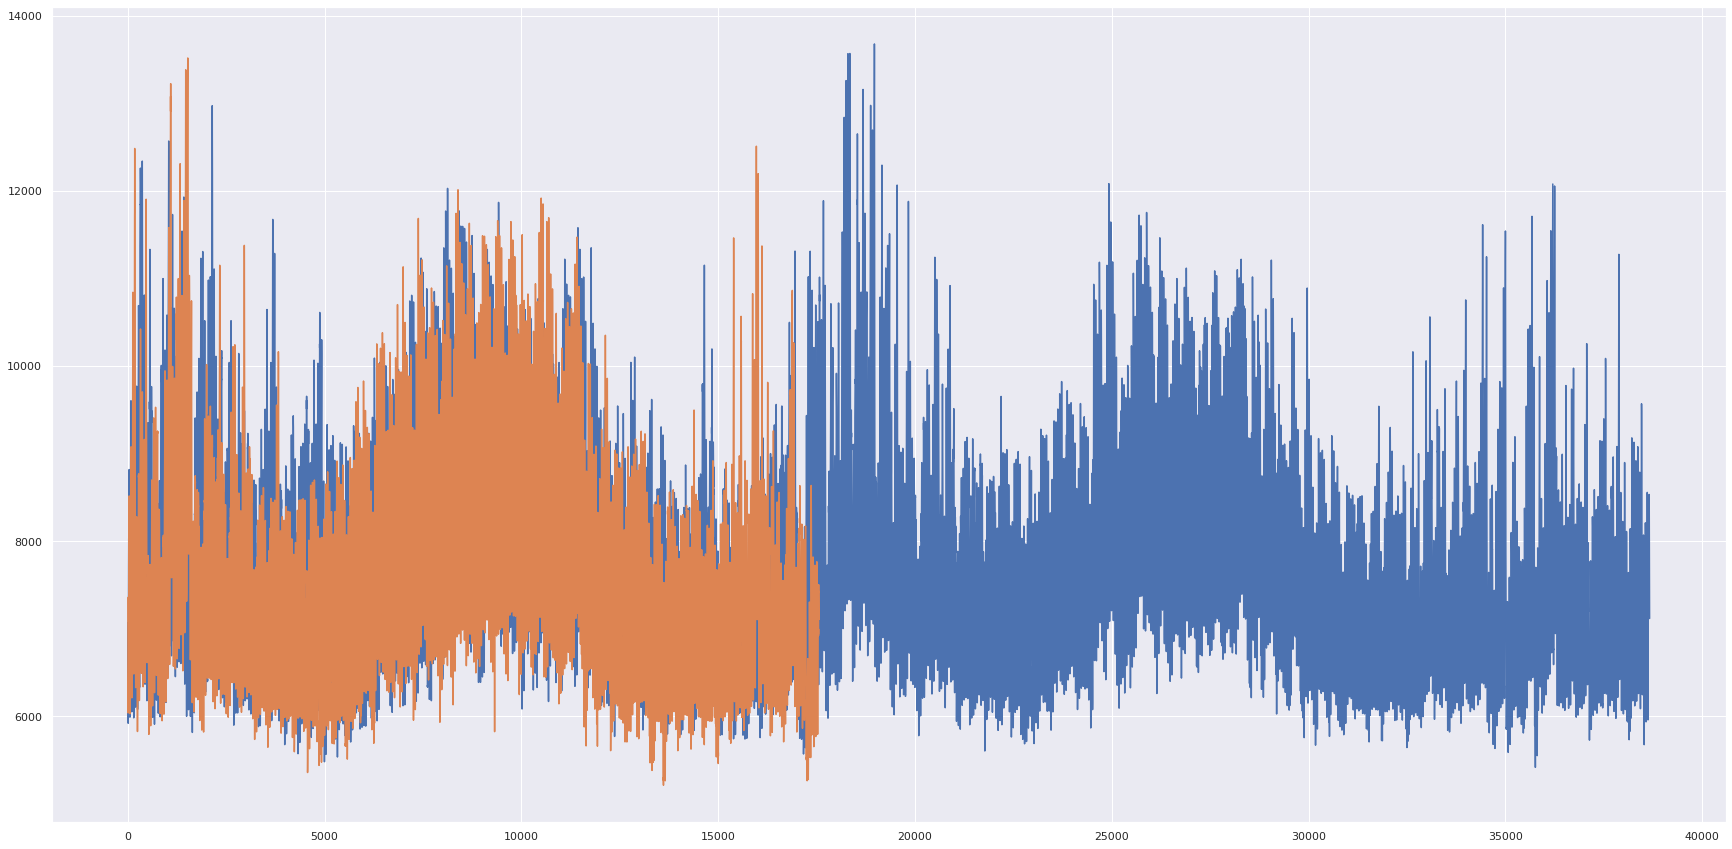

In [117]:
# Plot Output
plt.figure(figsize=(30,15))
plt.plot(y_predicttrain)
plt.plot(y_predicttest)
plt.show()

#### Y Test vs Y Test Predict

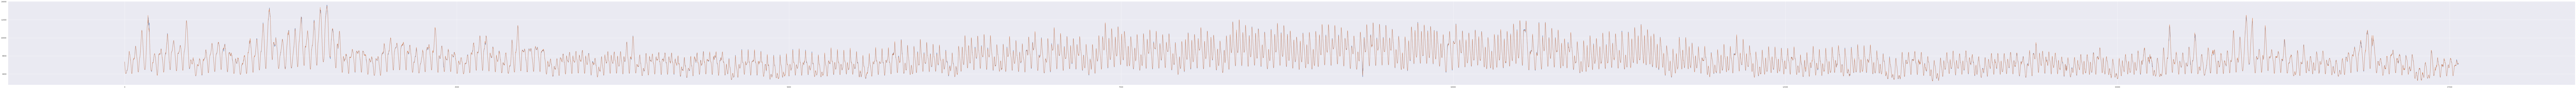

In [118]:
# Convert numpy to dataframe
df_y_predicttest = pd.DataFrame(y_predicttest, columns = ['TOTALDEMAND'])
df_y_predicttest.insert(0, 'New_ID', range(0, 0 + len(df_y_predicttest)))

# Convert to dataframe and insert new ID for join
df_y_test = pd.DataFrame(y_test, columns = ['TOTALDEMAND'])
df_y_test.insert(0, 'New_ID', range(0, 0 + len(df_y_test)))
# df_y_test

# Join test and predict output dataframes
df_y_test_plot = pd.merge(df_y_test, df_y_predicttest, how='left', left_on='New_ID', right_on='New_ID')

# Plot Output
plt.figure(figsize=(300,10))
plt.plot(df_y_test_plot['TOTALDEMAND_x'])
plt.plot(df_y_test_plot['TOTALDEMAND_y']) # Y Predict test

In [136]:
y_train

DATETIME
2018-01-01 00:00:00    7034.74
2018-01-01 00:30:00    6912.25
2018-01-01 01:00:00    6745.63
2018-01-01 01:30:00    6466.06
2018-01-01 02:00:00    6279.80
                        ...   
2021-03-17 22:00:00    7419.77
2021-03-17 22:30:00    7417.91
2021-03-17 23:00:00    7287.32
2021-03-17 23:30:00    7172.39
2021-03-18 00:00:00    7094.51
Name: TOTALDEMAND, Length: 38663, dtype: float64

### Y Test vs Y Test Predict DIFF

In [139]:
# plt.figure(figsize=(30,5))
# plt.plot(y_train['TOTALDEMAND'])

In [119]:
# y_train
# y_test
# y_predicttrain
y_predicttest

array([7357.62166278, 7150.61633693, 6880.6710352 , ..., 7210.57414986,
       7207.20877857, 7108.51908377])

In [120]:
y_predicttrain

array([7070.70448013, 6885.74931581, 6684.64970582, ..., 7317.73335902,
       7196.78531072, 7116.94744189])

In [121]:
df_y_train

New_ID  TOTALDEMAND
DATETIME                                
2018-01-01 00:00:00       0      7034.74
2018-01-01 00:30:00       1      6912.25
2018-01-01 01:00:00       2      6745.63
2018-01-01 01:30:00       3      6466.06
2018-01-01 02:00:00       4      6279.80
...                     ...          ...
2021-03-17 22:00:00   38658      7419.77
2021-03-17 22:30:00   38659      7417.91
2021-03-17 23:00:00   38660      7287.32
2021-03-17 23:30:00   38661      7172.39
2021-03-18 00:00:00   38662      7094.51

[38663 rows x 2 columns]

In [122]:
df_y_train

New_ID  TOTALDEMAND
DATETIME                                
2018-01-01 00:00:00       0      7034.74
2018-01-01 00:30:00       1      6912.25
2018-01-01 01:00:00       2      6745.63
2018-01-01 01:30:00       3      6466.06
2018-01-01 02:00:00       4      6279.80
...                     ...          ...
2021-03-17 22:00:00   38658      7419.77
2021-03-17 22:30:00   38659      7417.91
2021-03-17 23:00:00   38660      7287.32
2021-03-17 23:30:00   38661      7172.39
2021-03-18 00:00:00   38662      7094.51

[38663 rows x 2 columns]

In [123]:
# WIP: Need to plot y_train vs y_predicttrain, y_test vs y_predicttest
# Convert from numpy array to panda dataframd
df_y_train = pd.DataFrame(y_train, columns = ['TOTALDEMAND'])
# df_y_train = df_y_train.resample('M').mean()

# df_y_train

# merge df_y_train and df_y_predicttrain the plot???
# df_y_predicttrain = pd.DataFrame(y_predicttrain, columns = ['TOTALDEMAND'])

y_predicttrain

# df_y_test = pd.DataFrame(y_test, columns = ['TOTALDEMAND'])
# df_y_test = df_y_test.resample('M').mean()

# Plot Output
# plt.figure(figsize=(30,10))
# plt.plot(df_y_train['TOTALDEMAND'])
# plt.plot(df_y_predicttrain['TOTALDEMAND'])

array([7070.70448013, 6885.74931581, 6684.64970582, ..., 7317.73335902,
       7196.78531072, 7116.94744189])

In [124]:

# # Plot RMSE
# pyplot.plot(test)
# pyplot.plot(predictions)
# pyplot.show()

## LSTM

###Second Try!

In [125]:
df_lstm = pd.concat([X_train, y_train], axis = 1) 
df_lstm 
# X_test

FORECASTDEMAND  ...  TOTALDEMAND
DATETIME                             ...             
2018-01-01 00:00:00         7094.57  ...      7034.74
2018-01-01 00:30:00         6910.43  ...      6912.25
2018-01-01 01:00:00         6706.53  ...      6745.63
2018-01-01 01:30:00         6533.87  ...      6466.06
2018-01-01 02:00:00         6317.65  ...      6279.80
...                             ...  ...          ...
2021-03-17 22:00:00         7409.33  ...      7419.77
2021-03-17 22:30:00         7422.63  ...      7417.91
2021-03-17 23:00:00         7313.13  ...      7287.32
2021-03-17 23:30:00         7192.94  ...      7172.39
2021-03-18 00:00:00         7126.37  ...      7094.51

[38663 rows x 35 columns]

In [126]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# # load dataset
# df_model_lstm = pd.read_csv("/content/data/output.csv",header=0,infer_datetime_format=True,parse_dates=['DATETIME'],index_col=['DATETIME'])
# df_model_lstm

dataset = df_lstm 
values = dataset.values

# # Load X y
# train_X = X_train
# test_X = X_test
# train_y = y_train 
# test_y = y_test

# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# debug
reframed

# drop columns we don't want to predict
reframed.drop(reframed.columns[[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)
print(reframed.head())
 

(38663, 35)
   var1(t-1)  var2(t-1)  var3(t-1)  ...  var33(t)  var34(t)  var35(t)
1   0.204870        0.0        0.0  ...       0.0       0.0  0.176516
2   0.182410        0.0        0.0  ...       0.0       0.0  0.156305
3   0.157540        0.0        0.0  ...       0.0       0.0  0.122392
4   0.136480        0.0        0.0  ...       0.0       0.0  0.099798
5   0.110107        0.0        0.0  ...       0.0       0.0  0.087366

[5 rows x 54 columns]


(38662, 1, 53) (38662,) (0, 1, 53) (0,)
Epoch 1/50
537/537 - 18s - loss: 0.0417
Epoch 2/50
537/537 - 1s - loss: 0.0187
Epoch 3/50
537/537 - 1s - loss: 0.0147
Epoch 4/50
537/537 - 1s - loss: 0.0149
Epoch 5/50
537/537 - 1s - loss: 0.0132
Epoch 6/50
537/537 - 1s - loss: 0.0138
Epoch 7/50
537/537 - 1s - loss: 0.0133
Epoch 8/50
537/537 - 1s - loss: 0.0126
Epoch 9/50
537/537 - 1s - loss: 0.0112
Epoch 10/50
537/537 - 1s - loss: 0.0108
Epoch 11/50
537/537 - 1s - loss: 0.0108
Epoch 12/50
537/537 - 1s - loss: 0.0109
Epoch 13/50
537/537 - 1s - loss: 0.0107
Epoch 14/50
537/537 - 1s - loss: 0.0115
Epoch 15/50
537/537 - 1s - loss: 0.0098
Epoch 16/50
537/537 - 1s - loss: 0.0096
Epoch 17/50
537/537 - 1s - loss: 0.0107
Epoch 18/50
537/537 - 1s - loss: 0.0108
Epoch 19/50
537/537 - 1s - loss: 0.0104
Epoch 20/50
537/537 - 1s - loss: 0.0102
Epoch 21/50
537/537 - 1s - loss: 0.0097
Epoch 22/50
537/537 - 1s - loss: 0.0099
Epoch 23/50
537/537 - 1s - loss: 0.0098
Epoch 24/50
537/537 - 1s - loss: 0.0096
Epoch 25

KeyError: ignored

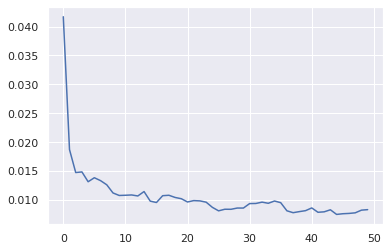

In [127]:

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 48 *8
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(test_X.shape, yhat.shape)
#debug
# test_X=test_X.reshape(1,4450314,1)

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [ ]:
# train_X.shape[1] #16
# train_X.shape[2] # tuple index out of range
train_X

## XGBOOST

In [128]:
# XGBoost
xgb_reg = XGBRegressor(
                 n_estimators=600,                                                                    
                 objective ='reg:linear'
                )

# Fit learning
xgb_reg.fit(X_train, y_train) 

# Prediction
y_predicttrain_xgboost = xgb_reg.predict(X_train)
y_predicttest_xgboost = xgb_reg.predict(X_test)

[03:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### RMSE

In [129]:
train_rmse_xgboost = rmse( y_predicttrain_xgboost, y_train) 
test_rmse_xgboost = rmse( y_predicttest_xgboost, y_test) 
# print(train_acc, test_acc) 
print('Train RMSE: {}\nTest RMSE: {}'.format(train_rmse_xgboost, test_rmse_xgboost))

Train RMSE: 59.26179650139927
Test RMSE: 67.00417104447949


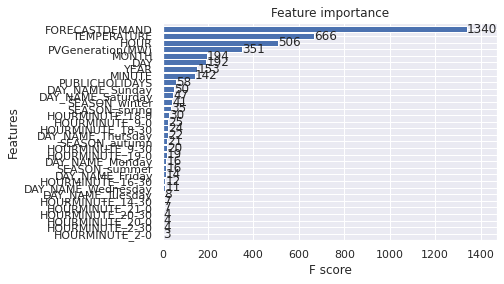

In [130]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(xgb_reg, height=0.9)

In [131]:
print(xgb_reg.feature_importances_)
# xgb_reg.feature_importances_

[9.9256247e-01 2.5506667e-04 2.8348772e-04 1.7517495e-04 4.9321167e-04
 8.9766178e-04 1.2303515e-04 1.9411602e-04 4.6628920e-04 1.0498204e-04
 8.4108888e-04 2.4737811e-04 2.0511240e-04 3.1470161e-05 7.7373494e-05
 2.8918334e-04 1.0179518e-04 8.0722741e-05 6.2337152e-05 2.4982714e-04
 2.1055297e-04 1.9508231e-04 7.1853465e-05 5.6994730e-05 1.2611694e-04
 9.4454597e-05 2.4497719e-04 6.1828461e-05 2.5365094e-04 3.2866144e-04
 2.9624309e-04 3.1778199e-04 0.0000000e+00 0.0000000e+00]


In [132]:
X.columns

Index(['FORECASTDEMAND', 'YEAR', 'MONTH', 'DAY', 'TEMPERATURE', 'HOUR',
       'MINUTE', 'PUBLICHOLIDAYS', 'PVGeneration(MW)', 'HOURMINUTE_14-30',
       'HOURMINUTE_16-30', 'HOURMINUTE_18-0', 'HOURMINUTE_18-30',
       'HOURMINUTE_19-0', 'HOURMINUTE_2-0', 'HOURMINUTE_2-30',
       'HOURMINUTE_20-0', 'HOURMINUTE_20-30', 'HOURMINUTE_21-0',
       'HOURMINUTE_9-0', 'HOURMINUTE_9-30', 'DAY_NAME_Friday',
       'DAY_NAME_Monday', 'DAY_NAME_Saturday', 'DAY_NAME_Sunday',
       'DAY_NAME_Thursday', 'DAY_NAME_Tuesday', 'DAY_NAME_Wednesday',
       'SEASON_autumn', 'SEASON_spring', 'SEASON_summer', 'SEASON_winter',
       'TEMPERATURERANGES_veryhigh', 'TEMPERATURERANGES_verylow'],
      dtype='object')

### Save output files

In [134]:
# y_test.to_csv("/content/data/output_y_test.csv")
# y_predicttest.to_csv("/content/data/output_y_predicttest.csv")

np.savetxt("/content/data/output_y_test_xgboost.csv", y_test, delimiter=",")
np.savetxt("/content/data/output_y_predicttest_xgboost.csv", y_predicttest_xgboost, delimiter=",")


## SARIMA

# Calculate Target Accuracy
Calculat RMSE on Forcast and Total from complete dataset

In [ ]:

#targetaccuracy = rmse(forecast,total)
targetaccuracy = rmse(df_final['FORECASTDEMAND'],df_final['TOTALDEMAND'])
print(targetaccuracy)
# RMSE: 85.87  (including pre-2012)
# RMSE: 77.67 (excluding pre-2012)

## Other sandpit models
* Linear regression
* Keras
* Pytorch

In [ ]:

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# #reg = LinearRegression().fit(X_train, y_train["TOTALDEMAND"])
# reg = LinearRegression().fit(X_train, y_train)
# y_train_pred = reg.predict(X_train)
# y_test_pred = reg.predict(X_test)

# RMSE_train = np.sqrt(mean_squared_error(y_train['TOTALDEMAND'], p_train))
# RMSE_test = np.sqrt(mean_squared_error(y_test['TOTALDEMAND'], p_test))

# print('Train RMSE: {}\nTest RMSE: {}'.format(RMSE_train, RMSE_test) )

In [ ]:

def summarized_scores(name,score,scores):
    s_scores=', '.join(['%.1f'%s for s in scores])
    print('%s:[%.3f] %s'%(name,score,s_scores))

In [ ]:

def to_supervized(train,n_in,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    X,y=[],[]
    in_start=0
    for i in range(len(data)):
        in_end=in_start+n_in
        out_end=in_end+n_out
        if out_end<len(data):
            x_in=data[in_start:in_end,0]
            x_in=x_in.reshape((len(x_in),1))
            X.append(x_in)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return np.array(X),np.array(y)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

In [ ]:

def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model

In [ ]:

def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [ ]:

def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [ ]:

# X = df_forecast
# y = 
# # Split train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 25)

# train,test=split(df_final.values)

# WIP (Work in progress)
2. Plot predicted output
3. No onehot for LSTM
4. Add LSTM model
5. Add GRU model

#TO DO!!!
1. Add business hours feature, low/medium/ 
2. Add colours to V shape group for weekday and weekend = DONE
3. get the date and time of the top 100 biggest errors ? 
4. Bushfire events = view, not match
5. Solar data - James
6. Daylight data
7. Cloud cover data - https://www.earthenv.org/cloud
8. Need to group business hour?
9. Regression for significances

# DONE
1. Add season/quarter feature = DONE (not improve RMSE)
2. High, low temperature = = DONE (small improvement of RMSE)
3. One hot encoding a version of “hour” or “30”mins = DONE (improve RMSE from 75 to 74.77)
4. Get baseslines RMSE = 75
5. Add public holidays
6. Add public holidays work day, non-weekday as categorical
7. Train test split by date ranges, not random

In [ ]:

# # Generate 'business hour' feature

# for i in range(len(df_forecast)):
#     position = df_forecast.index[i]
#     hour = position.hour
#     if ((hour > 8 and hour < 12) or (hour > 14 and hour < 21)):
#         df_forecast.loc[position, 'business hour'] = 2
#     elif (hour >= 12 and hour <= 14):
#         df_forecast.loc[position, 'business hour'] = 1
#     else:
#         df_forecast.loc[position, 'business hour'] = 0